Wi-Fi 신호로 현재위치 및 빌딩 추측
=====

- ### 분석자: 박지훈
- ### 분석기간: 2017.08.10
- ### 사용자료: UJIIndoorLoc Data Set
- ### 자료출처: UCL Machine Learning Repository(https://archive.ics.uci.edu/ml/datasets/ujiindoorloc)
- ### 분석방법: OLS(Ordinary Least Square), QDA(Quadratic Discriminant Analysis), K-Neighbors Regression

---

### 패키지 불러오기

In [1]:
# import packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import *
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
from sklearn.preprocessing import normalize

C:\Users\SNB\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### 데이터 불러오기

In [5]:
# data read
raw_train = pd.read_csv("trainingData.csv")
raw_validation = pd.read_csv("validationData.csv")

In [4]:
raw_train.head(n=10)

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.264300,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.621200,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.152400,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.570400,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.143600,4.864982e+06,0,0,122,2,11,13,1369909710
5,100,100,100,100,100,100,100,100,100,100,...,100,-7533.896200,4.864939e+06,2,1,105,2,2,23,1371713841
6,100,100,100,100,100,100,100,100,100,100,...,100,-7519.152400,4.864950e+06,2,1,103,2,2,23,1371713883
7,100,100,100,100,100,100,100,100,100,100,...,100,-7527.451100,4.864929e+06,2,1,101,2,2,23,1371713775
8,100,100,100,100,100,100,100,100,100,100,...,100,-7559.497300,4.864888e+06,2,1,112,2,2,23,1371714307
9,100,100,100,100,100,100,100,100,100,100,...,100,-7510.437173,4.864949e+06,2,1,103,1,2,23,1371714128


In [5]:
raw_validation.head(n=10)

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703
1,100,100,100,100,100,100,100,100,100,100,...,100,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054
2,100,100,100,100,100,100,100,100,100,100,...,100,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138
4,100,100,100,100,100,100,100,100,100,100,...,100,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774
5,100,100,100,100,100,100,100,100,100,100,...,100,-7338.807210,4.864825e+06,2,2,0,0,0,12,1380874853
6,100,100,100,100,100,100,100,100,100,100,...,100,-7379.351683,4.864849e+06,3,2,0,0,0,20,1380874982
7,100,100,100,100,100,100,100,100,100,100,...,100,-7340.558777,4.864759e+06,3,2,0,0,0,21,1380875085
8,100,100,100,100,100,100,100,100,100,100,...,100,-7357.531253,4.864766e+06,2,2,0,0,0,12,1380875092
9,100,100,100,100,100,100,100,100,100,100,...,100,-7345.085170,4.864831e+06,0,2,0,0,0,20,1380875118


### 칼럼 설명

|번호|<center>구분|<center>칼럼명|<center>설명|<center>범위|
|----|----|--------------|------------|------------|
|<center>1|<center>Integer|<center>WAP001 ~ WAP520|WAP001부터 WAP520까지의 신호세기<br><center>신호가 없을시 100, 가장강한신호 -104|<center>-104 ~ 100|
|<center>2|<center>Real|<center>LONGITUDE|<center>관측 경도|<center>-7691.3384 ~ -7300.81899009|
|<center>3|<center>Real|<center>LATITUDE|<center>관측 위도|<center>4864745.74502 ~ 4865016.6878|
|<center>4|Categorical Integer|<center>FLOOR|<center>층 수|<center>0, 1, 2, 3, 4|
|<center>5|Categorical Integer|<center>BUILDING|<center>빌딩 ID|<center>0, 1, 2|
|<center>6|Categorical Integer|<center>SPACEID|<center>방 ID|<center>1:18, 22, 25:30, 101:147, 201:250, 253, 254|
|<center>7|Categorical Integer|<center>RELATIVEPOSITION|<center>공간에 대한 상대적 위치|<center>1: 실내, 2: 실외|
|<center>8|Categorical Integer|<center>USERID|<center>기록자 식별코드(기록자의 신장)|<center>0 ~ 18|
|<center>9|Categorical Integer|<center>PHONEID|<center>안드로이드 기기 식별코드|<center>0 ~ 24|
|<center>10|<center>Integer|<center>TIMESTAMP|<center>좌표가 기록된 UNIX시간|<center>1369908924 ~ 1371737745|

In [59]:
for i in raw_train.columns[-9:]:
    print(i, "-min:", raw_train[i].min(), ", max:", raw_train[i].max())

LONGITUDE -min: -7691.3384 , max: -7300.81899009
LATITUDE -min: 4864745.74502 , max: 4865016.6878
FLOOR -min: 0 , max: 4
BUILDINGID -min: 0 , max: 2
SPACEID -min: 1 , max: 254
RELATIVEPOSITION -min: 1 , max: 2
USERID -min: 1 , max: 18
PHONEID -min: 1 , max: 24
TIMESTAMP -min: 1369908924 , max: 1371737745


### EDA(탐색적 시각화)
랜덤으로 칼럼을 추출하여 데이터 분포양상 확인

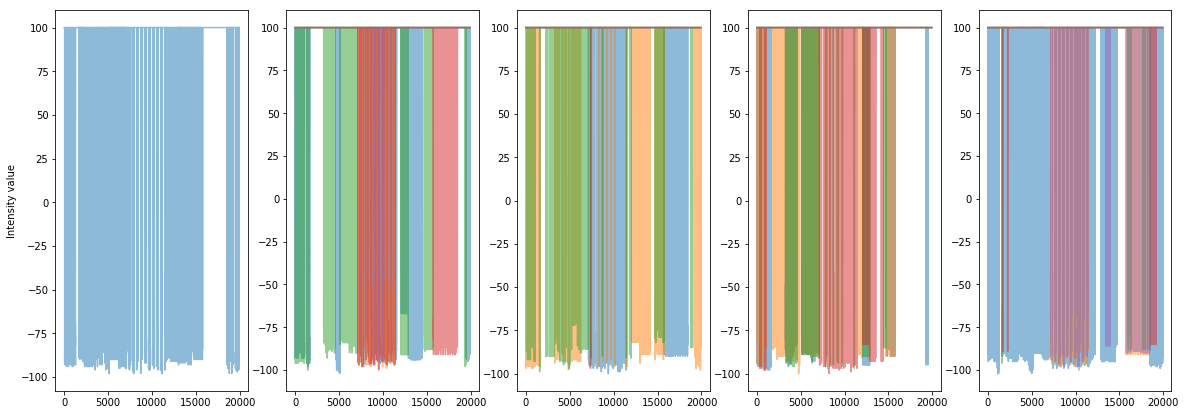

In [5]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 5, 1)
plt.plot(raw_train.iloc[:, np.random.randint(0, np.size(raw_train, axis=1)-9, 1)], alpha=0.5)
plt.ylabel("Intensity value")
plt.subplot(1, 5, 2)
plt.plot(raw_train.iloc[:, np.random.randint(0, np.size(raw_train, axis=1)-9, 5)], alpha=0.5)
plt.subplot(1, 5, 3)
plt.plot(raw_train.iloc[:, np.random.randint(0, np.size(raw_train, axis=1)-9, 5)], alpha=0.5)
plt.subplot(1, 5, 4)
plt.plot(raw_train.iloc[:, np.random.randint(0, np.size(raw_train, axis=1)-9, 5)], alpha=0.5)
plt.subplot(1, 5, 5)
plt.plot(raw_train.iloc[:, np.random.randint(0, np.size(raw_train, axis=1)-9, 5)], alpha=0.5)
plt.show()

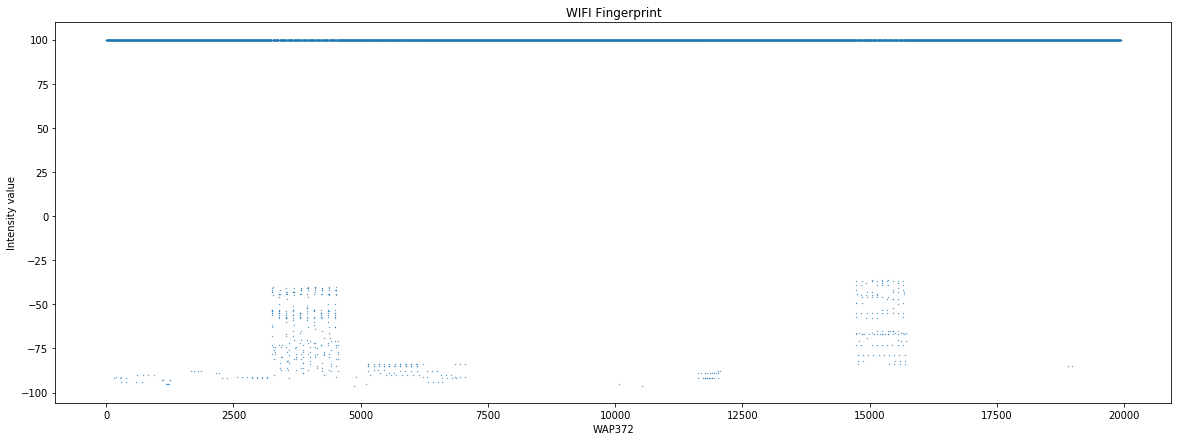

In [88]:
select = raw_train.iloc[:, np.random.randint(0, np.size(raw_train, axis=1)-9)]
plt.figure(figsize=(20, 7))
plt.scatter(raw_train.index, select, s=0.1)
plt.xlabel(select.name)
plt.ylabel("Intensity value")
plt.title("WIFI Fingerprint")
plt.show()

Wi-Fi신호 세기 범위

In [6]:
print("Max_value:{:.2f}".format(raw_train.iloc[:, :519].values.max()), ",", "Min_value:{:.2f}".format(raw_train.iloc[:, :519].values.min()))

Max_value:100.00 , Min_value:-104.00


In [7]:
raw_train.describe().iloc[:, :520]

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.0
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,84.974921,99.866881,98.881276,98.833325,99.436525,73.705673,59.889803,99.788634,99.970507,100.0
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,50.099899,5.023663,14.206023,14.634613,10.259137,62.278292,74.060259,6.360671,2.404232,0.0
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,-103.000000,-97.000000,-92.000000,-90.000000,-97.000000,-101.000000,-101.000000,-97.000000,-97.000000,100.0
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0


### 변수 정규화-1

In [3]:
# normalization_1
nor_train = (raw_train.iloc[:, 0:520]-1)/(-105)
nor_train[nor_train == -0.9428571428571428] = 0
#nor_train = nor_train.join(raw_train.iloc[:, 520:])

nor_validation = (raw_validation.iloc[:, 0:520]-1)/(-105)
nor_validation[nor_validation == -0.9428571428571428] = 0
#nor_validation = nor_validation.join(raw_validation.iloc[:, 520:])

In [359]:
scale_train = pd.DataFrame(scale(raw_train.iloc[:, :520]), columns=raw_train.columns[:520])
scale_validation = pd.DataFrame(scale(raw_validation.iloc[:, :520]), columns=raw_validation.columns[:520])

nor_train = pd.DataFrame(normalize(raw_train.iloc[:, :520]), columns=raw_train.columns[:520])
nor_validation = pd.DataFrame(normalize(raw_validation.iloc[:, :520]), columns=raw_validation.columns[:520])

In [9]:
scale_validation.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,0.085151,0.0,0.042466,0.042464,0.0,0.0,0.0,0.177473,0.234386,0.079606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030015
1,0.085151,0.0,0.042466,0.042464,0.0,0.0,0.0,0.177473,0.234386,0.079606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030015
2,0.085151,0.0,0.042466,0.042464,0.0,0.0,0.0,0.177473,0.234386,0.079606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030015
3,0.085151,0.0,0.042466,0.042464,0.0,0.0,0.0,0.177473,0.234386,0.079606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030015
4,0.085151,0.0,0.042466,0.042464,0.0,0.0,0.0,0.177473,0.234386,0.079606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030015


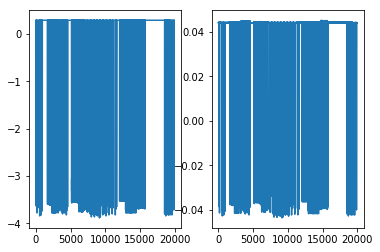

In [11]:
plt.subplot(1, 2, 1)
plt.plot(scale_train.iloc[:, 112])
plt.subplot(1, 2, 2)
plt.plot(nor_train.iloc[:, 112])
plt.show()

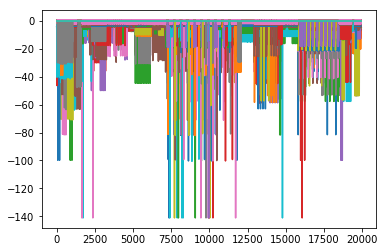

In [10]:
plt.plot(scale(raw_train.iloc[:, :520]))
plt.show()

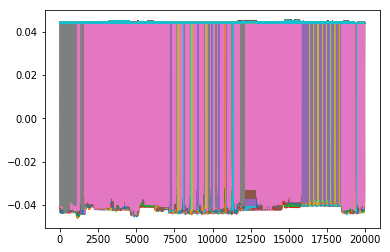

In [13]:
plt.plot(normalize(raw_train.iloc[:, :520]))
plt.show()

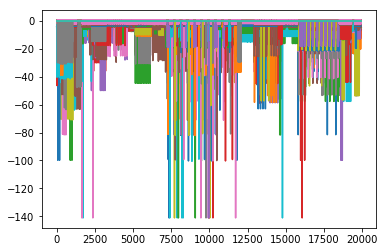

In [12]:
plt.plot(scale_train.iloc[:, :])
plt.show()

### 변수정규화-2

In [46]:
nor_train = abs(raw_train.iloc[:, :520] - 100)
nor_validation = abs(raw_validation.iloc[:, :520] -100)

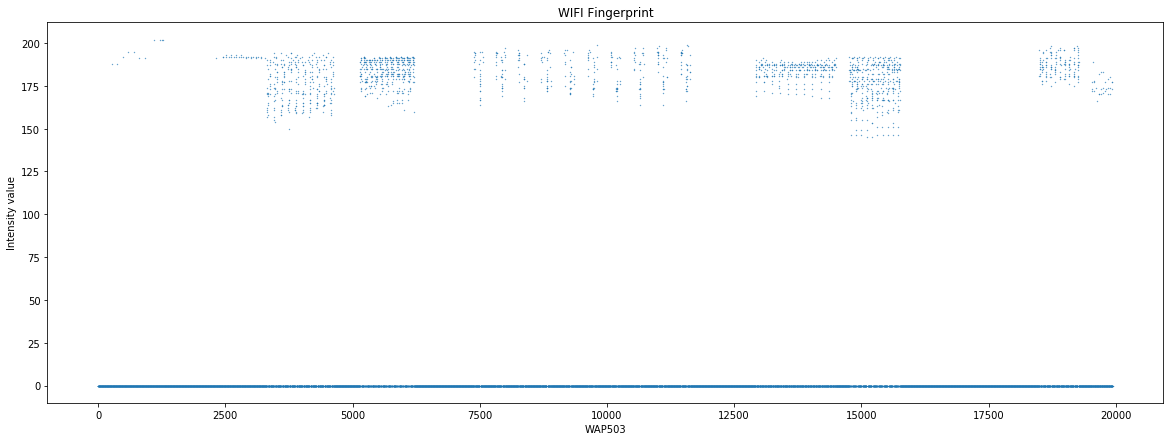

In [47]:
select = nor_train.iloc[:, np.random.randint(0, np.size(nor_train, axis=1))]
plt.figure(figsize=(20, 7))
plt.scatter(nor_train.index, select, s=0.1)
plt.xlabel(select.name)
plt.ylabel("Intensity value")
plt.title("WIFI Fingerprint")
plt.show()

### One-Hot-Encoding
층 수, 빌딩 번호는 명목변수이기 때문에 정수 표현을 위해서는 One-Hot-Encoding이 필요

In [48]:
OHE = OneHotEncoder(dtype=int)
OHE_fit = OHE.fit(raw_train.iloc[:, [522, 523, 527]])

train_ohe = pd.DataFrame(OHE_fit.transform(raw_train.iloc[:, [522, 523, 527]]).toarray())
train_ohe.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [49]:
validation_ohe = pd.DataFrame(OHE_fit.transform(raw_validation.iloc[:, [522, 523, 527]]).toarray())
validation_ohe.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 데이터 병합
One-Hot-Encoding 한 데이터를 정규화시킨 데이터와 병합 

In [50]:
train_x = nor_train.join(train_ohe)

In [51]:
train_y = raw_train.iloc[:, 520:522]

In [52]:
validation_x = nor_validation.join(validation_ohe)

In [53]:
validation_y = raw_validation.loc[:, ("LONGITUDE", "LATITUDE")]

### K-Neighbors Regression

In [92]:
model_KN = KNeighborsRegressor(n_neighbors=3).fit(train_x, train_y)
predic_y = model_KN.predict(validation_x)

In [99]:
gap = predic_y-raw_validation.loc[:, ("LONGITUDE", "LATITUDE")]
print("Gap\n{}".format(np.mean(abs(gap))), "\n\nVariance\n{}".format(np.var(gap)))

Gap
LONGITUDE    8.614284
LATITUDE     8.444157
dtype: float64 

Variance
LONGITUDE    206.744559
LATITUDE     214.981953
dtype: float64


In [95]:
np.mean(np.sqrt(np.sum((real_locale-pre_locale)*(real_locale-pre_locale), axis=1)))

13.244001593898101

In [100]:
gap.head()

,LONGITUDE,LATITUDE
0,48.017402,16.826357
1,-1.659179,-0.781307
2,4.291380,1.219778
3,-6.978017,6.473546
4,-4.020130,-1.012461


### K-Neighbers Regression 시각화

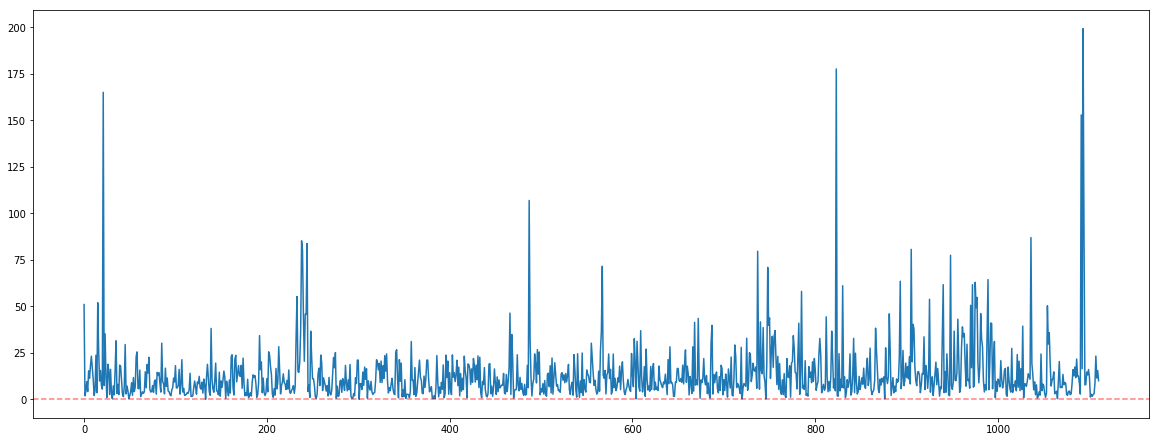

In [98]:
real_locale = raw_validation.loc[:, ("LONGITUDE", "LATITUDE")]
pre_locale = pd.DataFrame(predic_y, columns=["LONGITUDE", "LATITUDE"])
plt.figure(figsize=(20, 7.5))
plt.plot(np.sqrt(np.sum((real_locale-pre_locale)*(real_locale-pre_locale), axis=1)))
plt.axhline(0, c="red", alpha=0.5, linestyle="--")
plt.show()

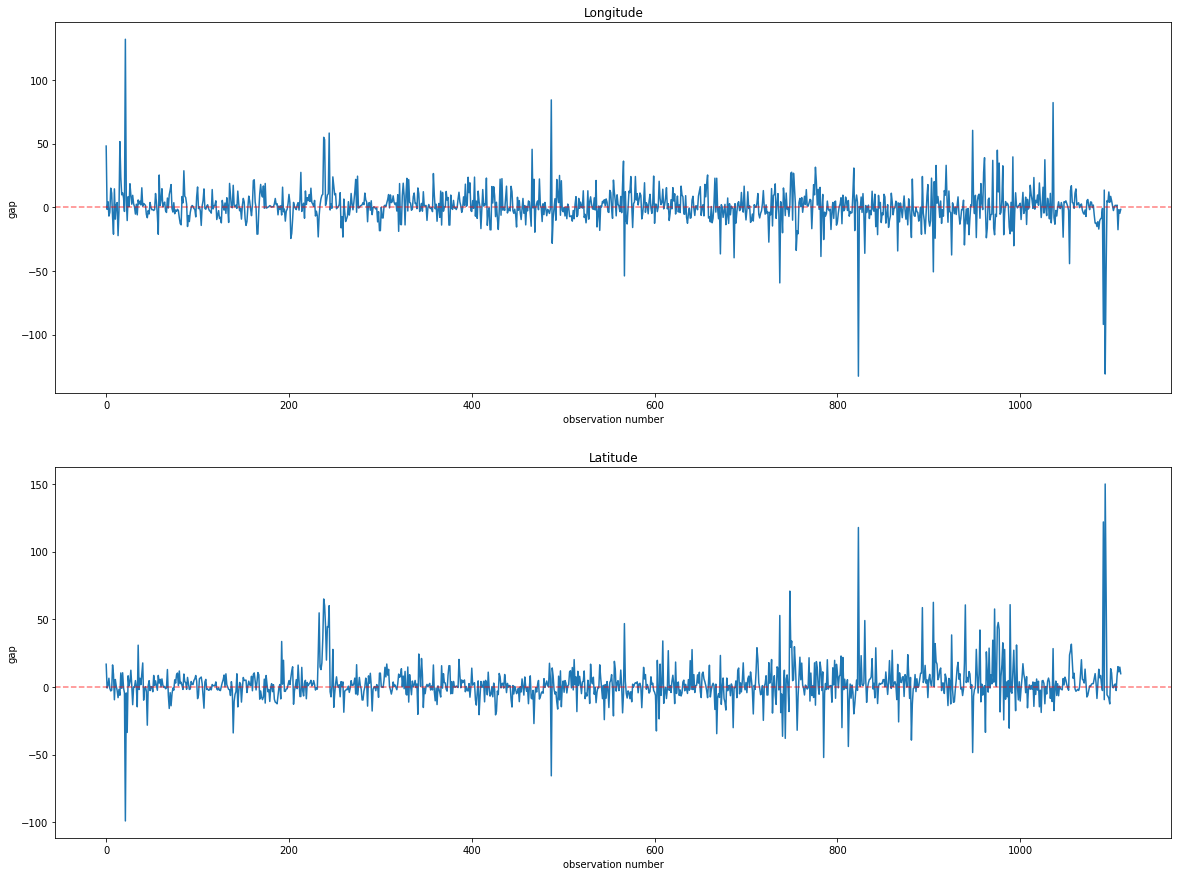

In [97]:
plt.figure(figsize=(20, 15))
plt.subplot(2, 1, 1)
plt.plot(gap.iloc[:,0])
plt.axhline(0, c="red", alpha=0.5, linestyle="--")
plt.title("Longitude")
plt.xlabel("observation number")
plt.ylabel("gap")
plt.subplot(2, 1, 2)
plt.plot(gap.iloc[:,1])
plt.axhline(0, c="red", alpha=0.5, linestyle="dashed")
plt.title("Latitude")
plt.xlabel("observation number")
plt.ylabel("gap")
plt.show()

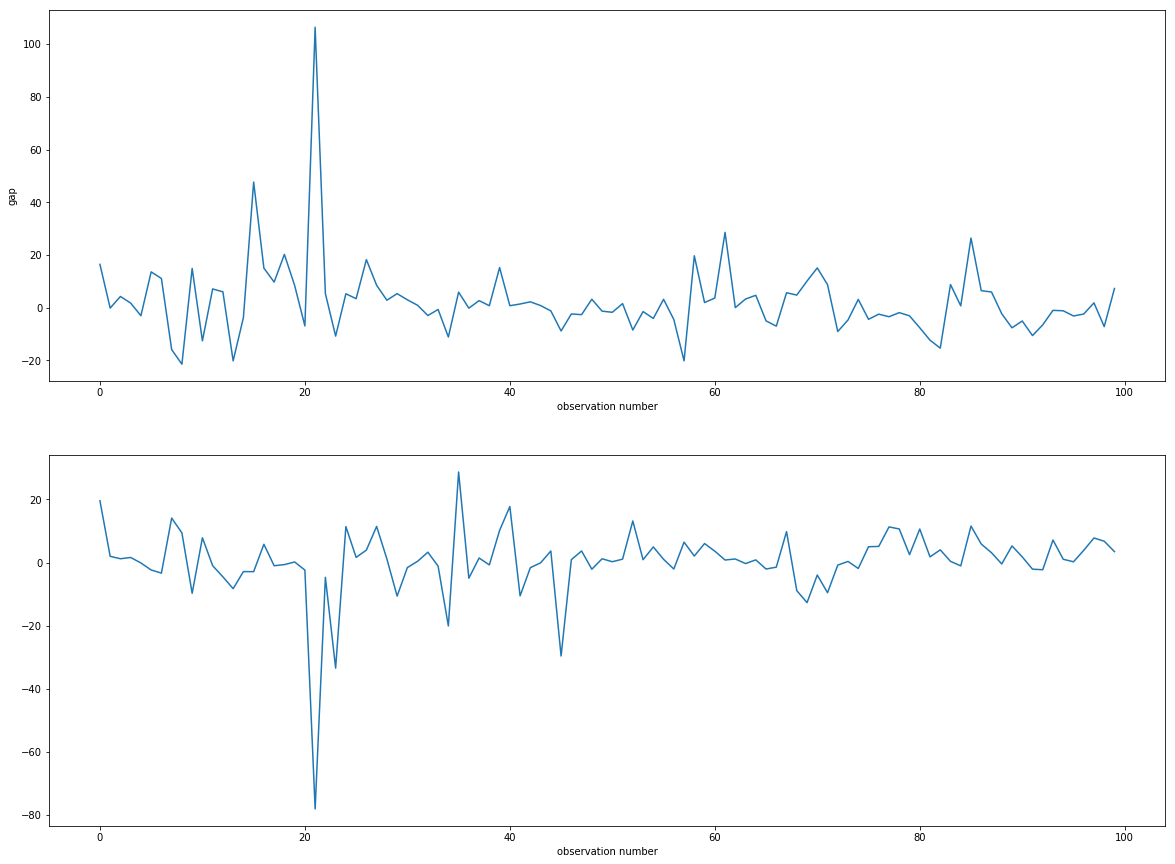

In [60]:
plt.figure(figsize=(20, 15))
plt.subplot(2, 1, 1)
plt.plot(gap.iloc[:,0][:100])
plt.xlabel("observation number")
plt.ylabel("gap")
plt.subplot(2, 1, 2)
plt.plot(gap.iloc[:,1][:100])
plt.xlabel("observation number")
plt.show()

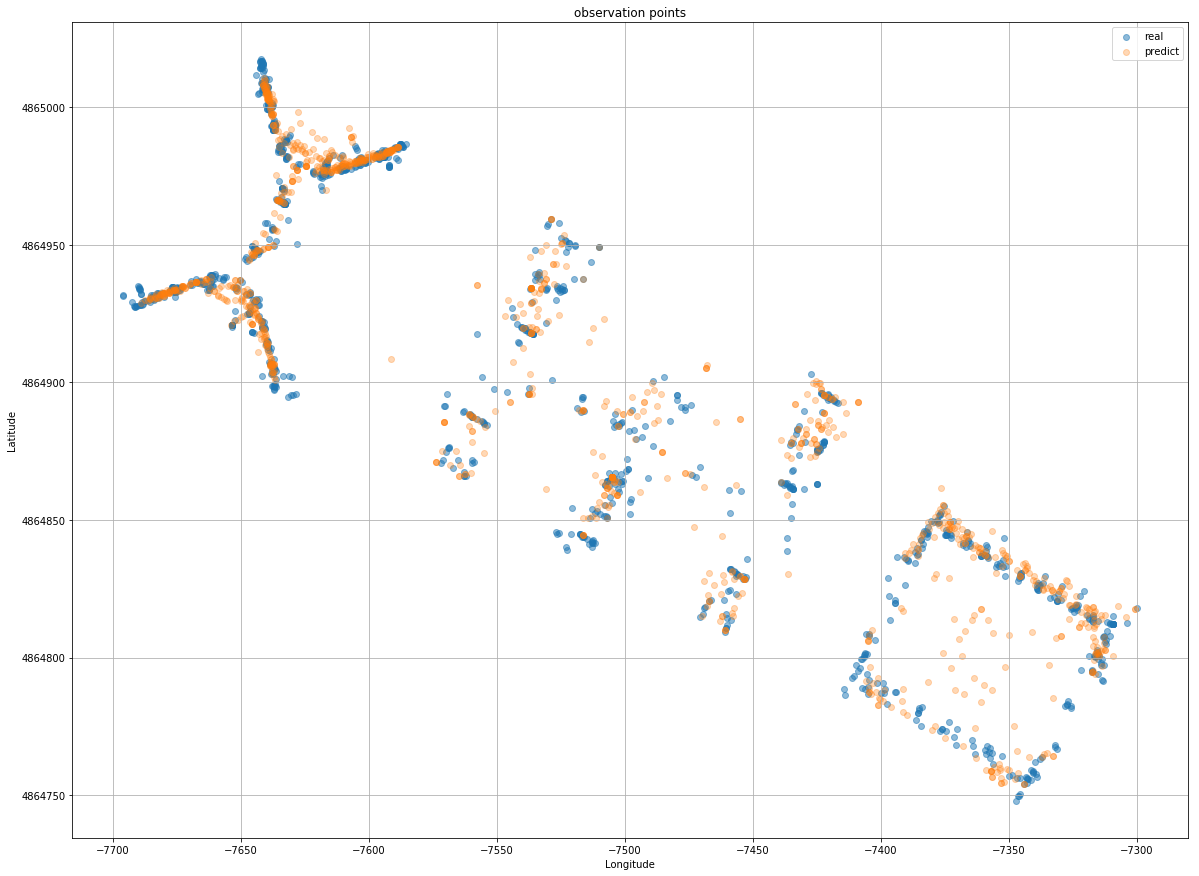

In [101]:
plt.figure(figsize=(20, 15))
plt.scatter(raw_validation["LONGITUDE"], raw_validation["LATITUDE"], label = "real", alpha=0.5)
plt.scatter(pd.DataFrame(predic_y)[0], pd.DataFrame(predic_y)[1], label = "predict", alpha=0.3)
plt.legend()
plt.grid()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("observation points")
plt.ticklabel_format(style = "plain")
#plt.ylim(4864745.7450159714 ,4865017.3646842018)
#plt.xlim(-7695.9387549299299000, -7299.786516730871000 )
plt.show()

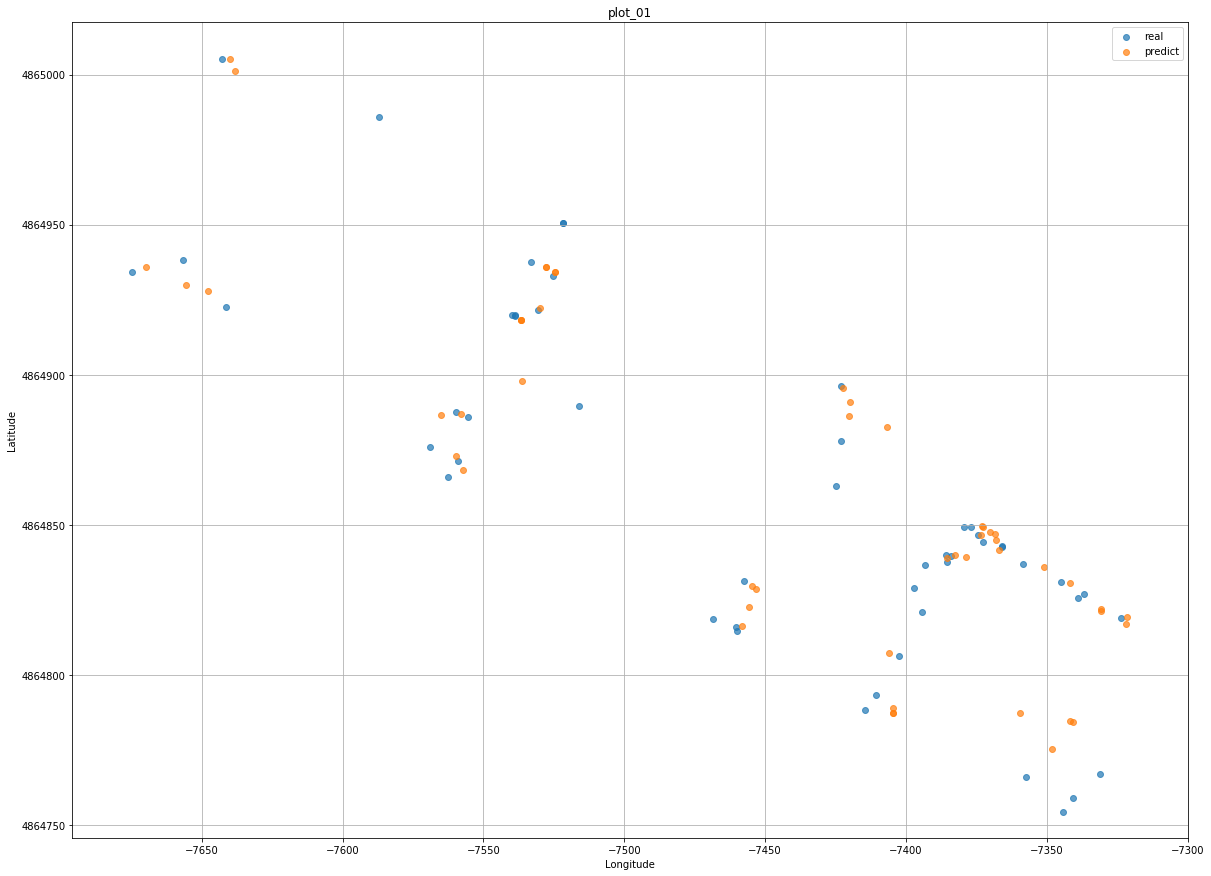

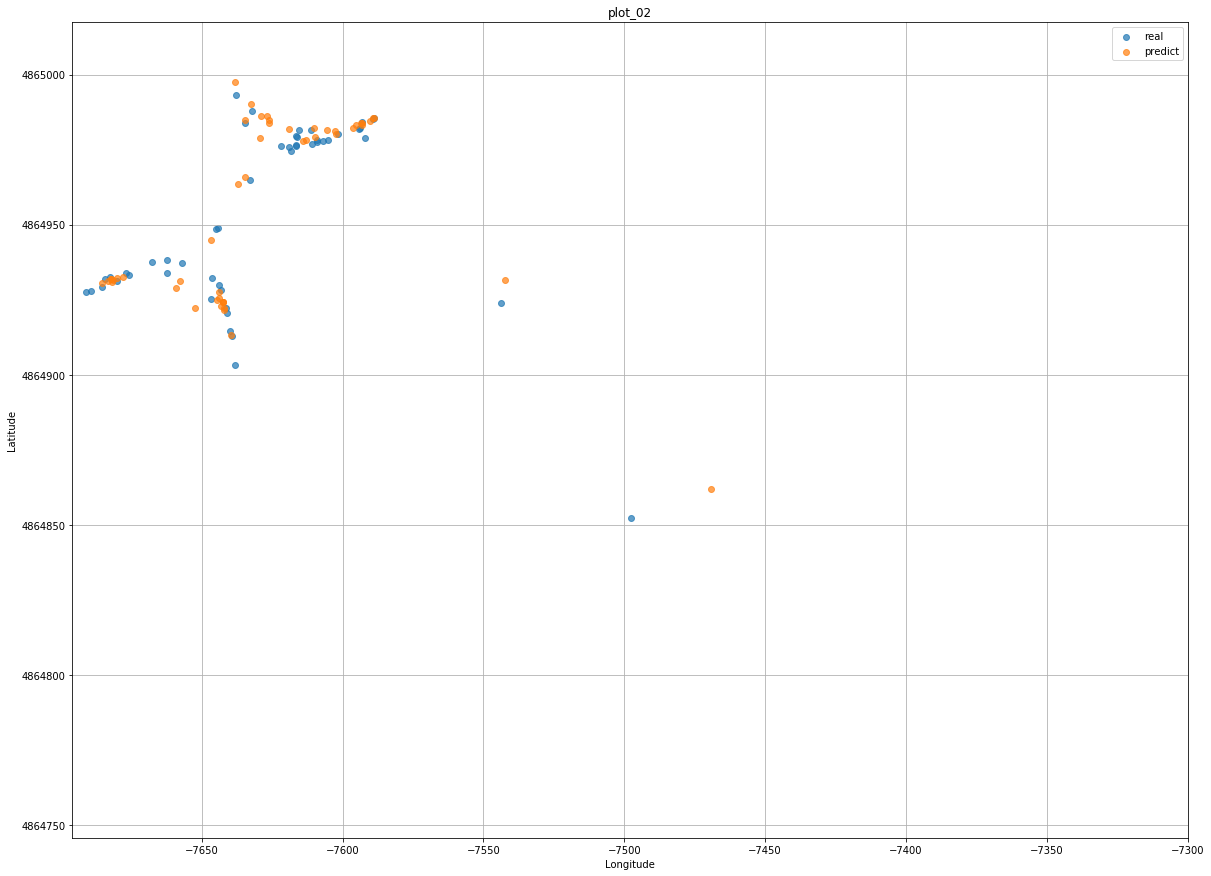

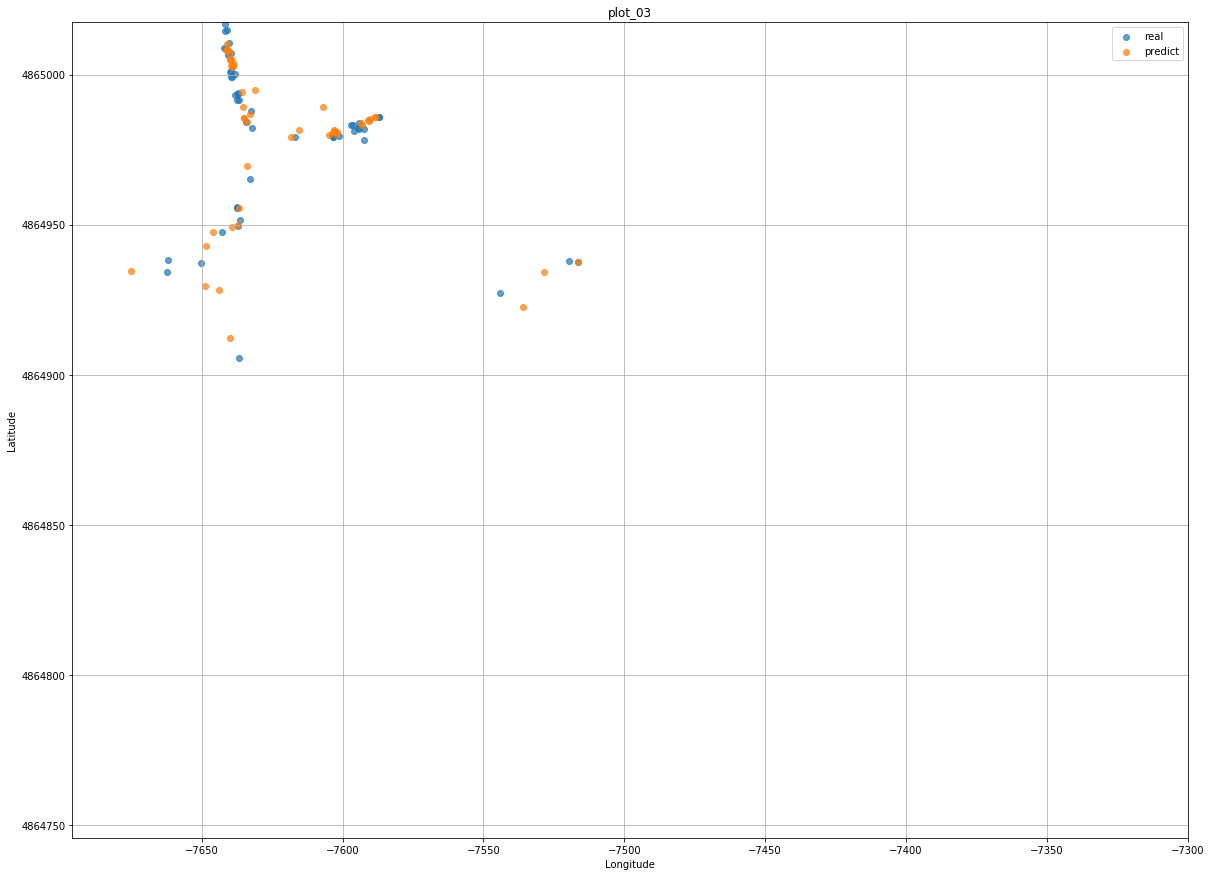

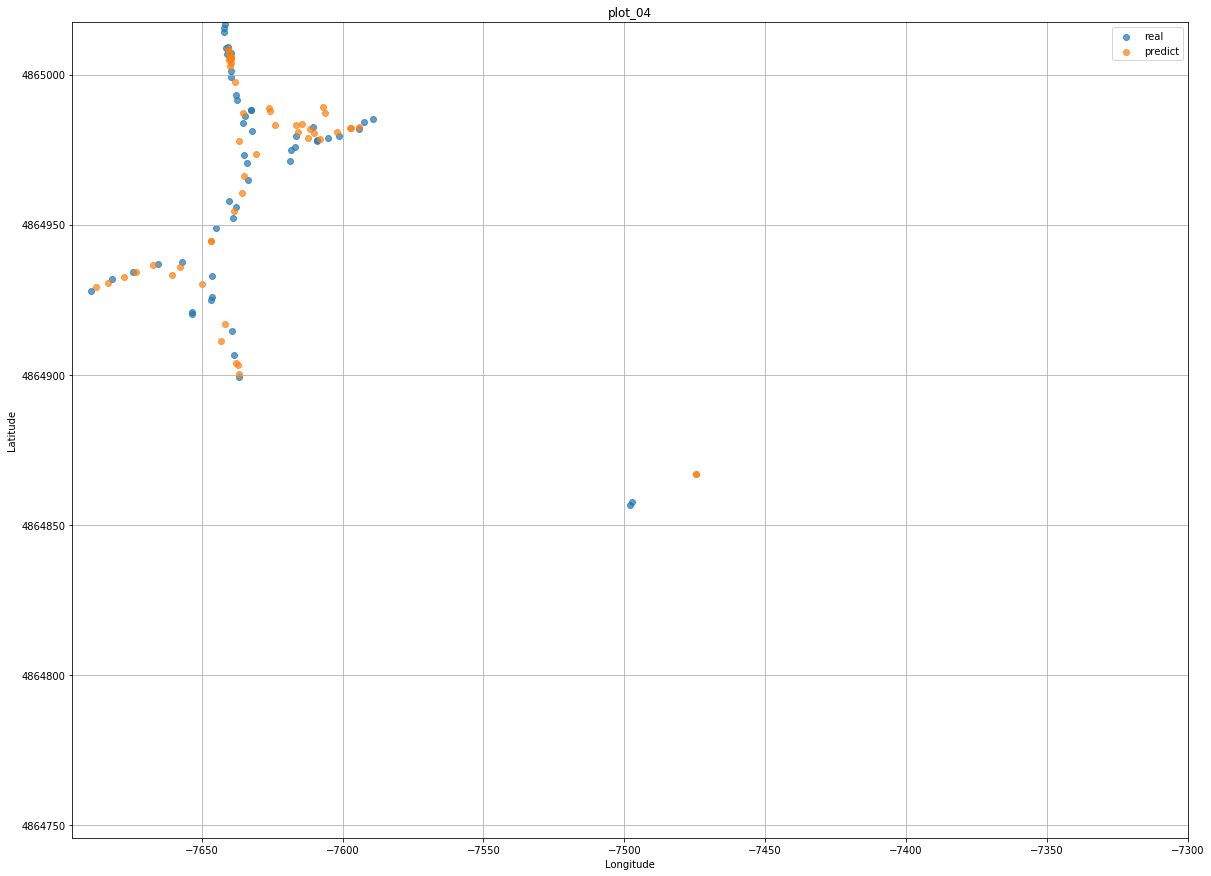

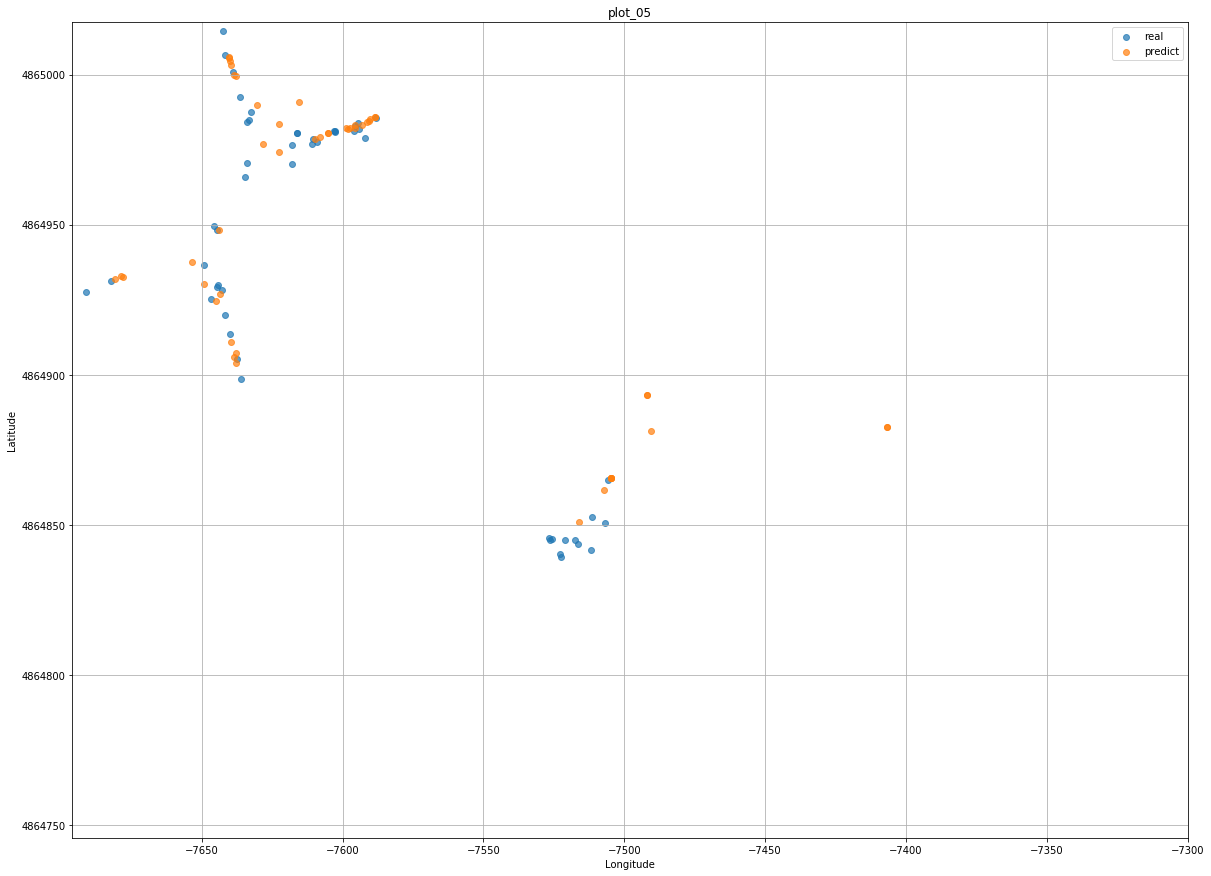

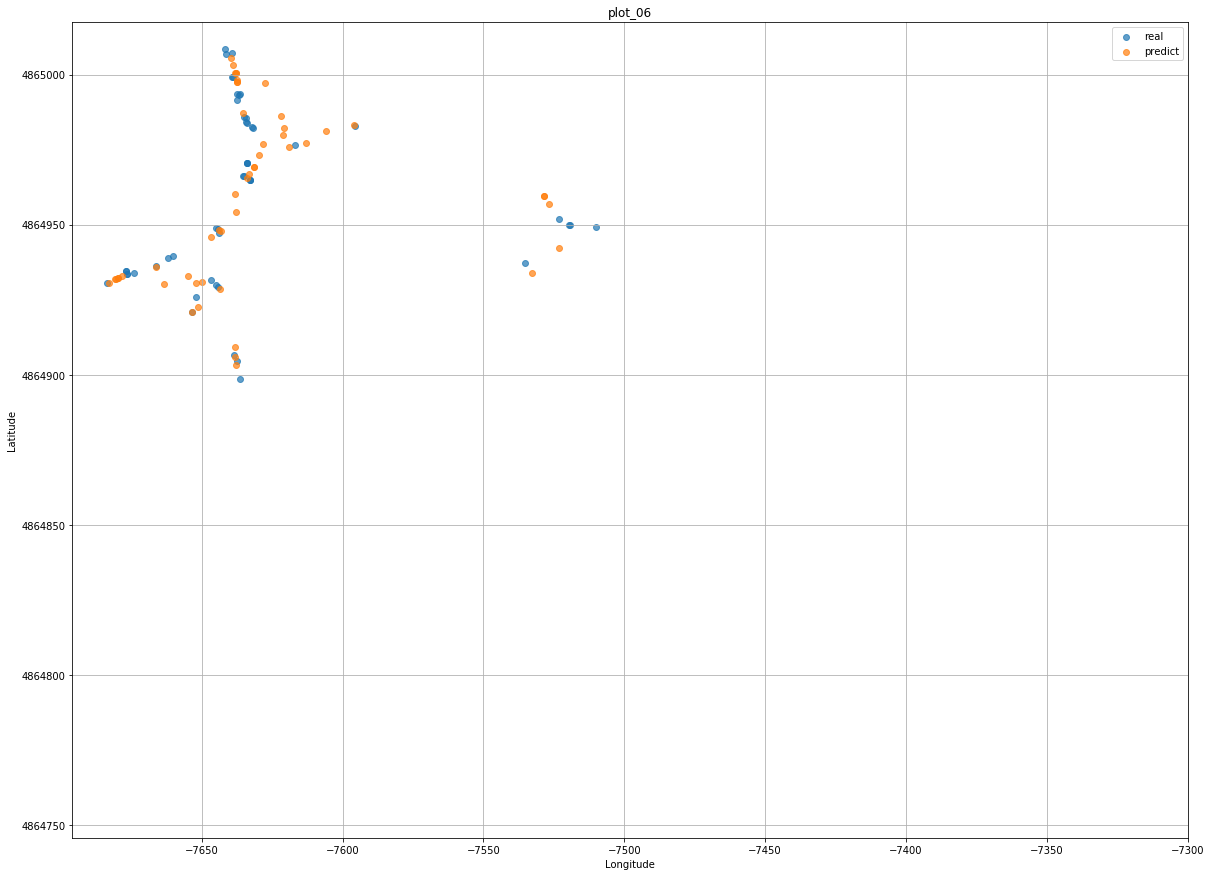

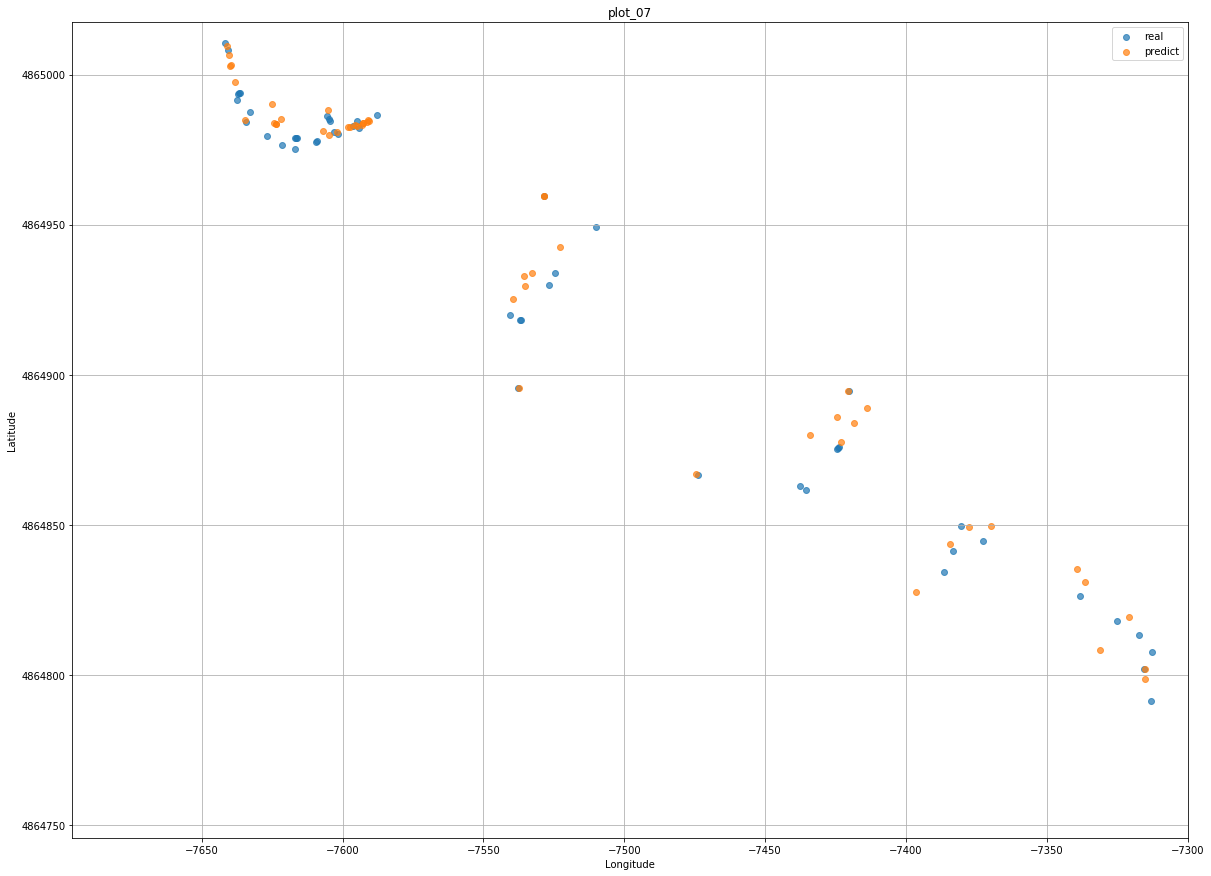

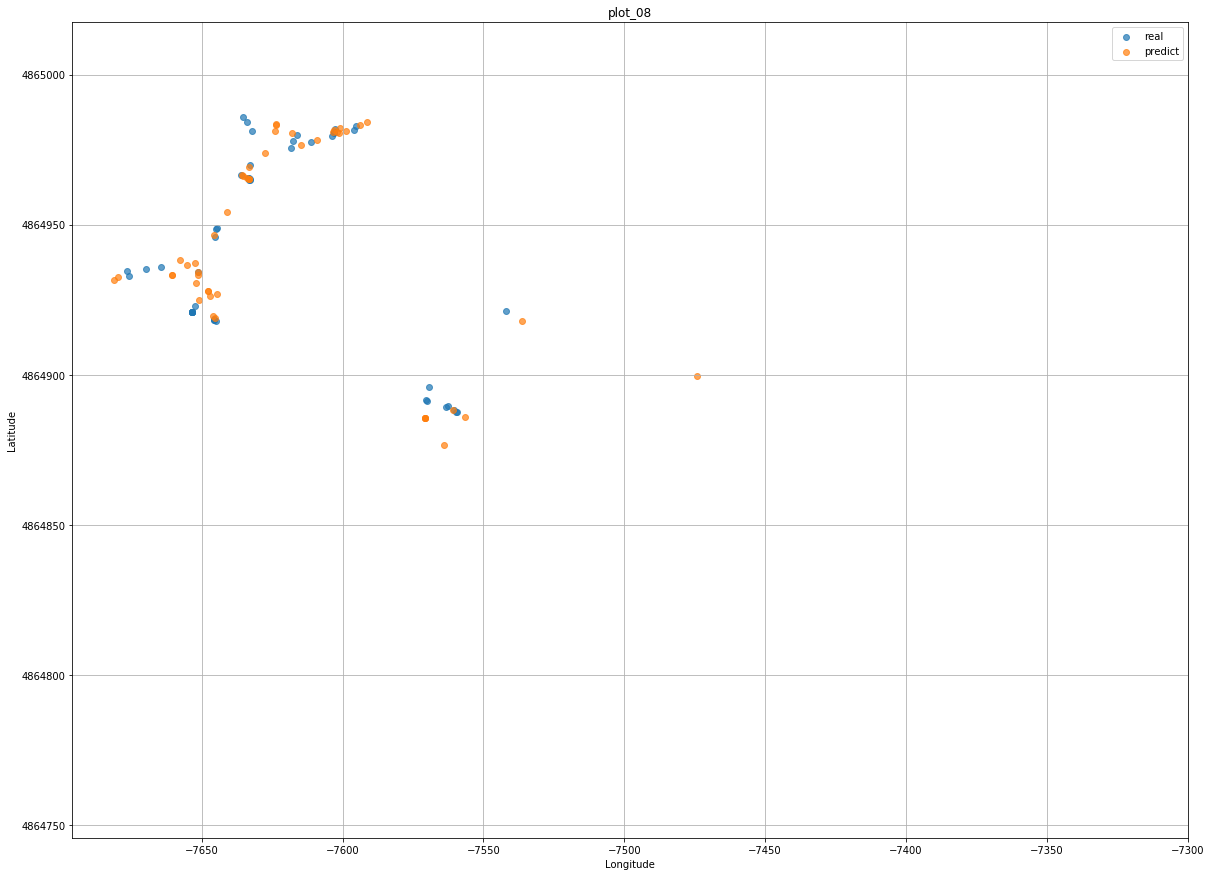

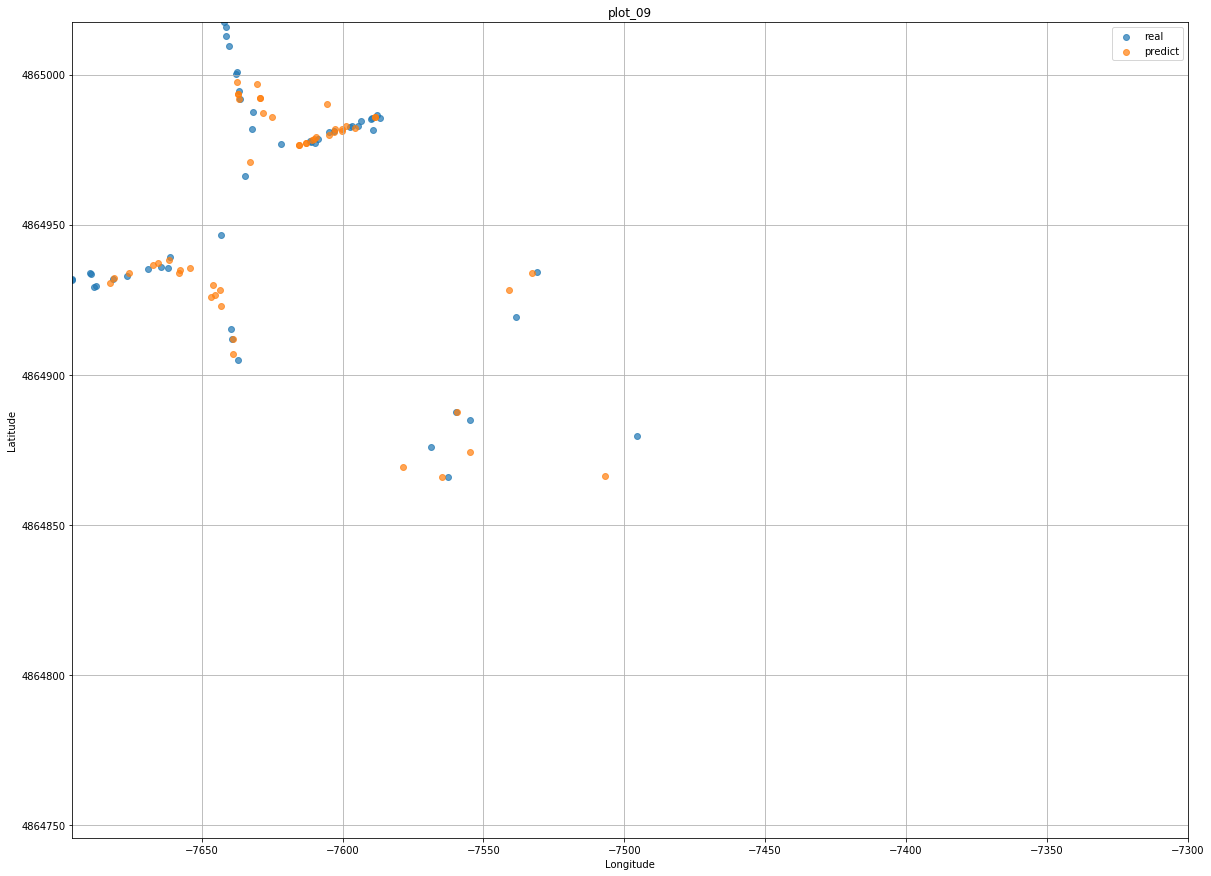

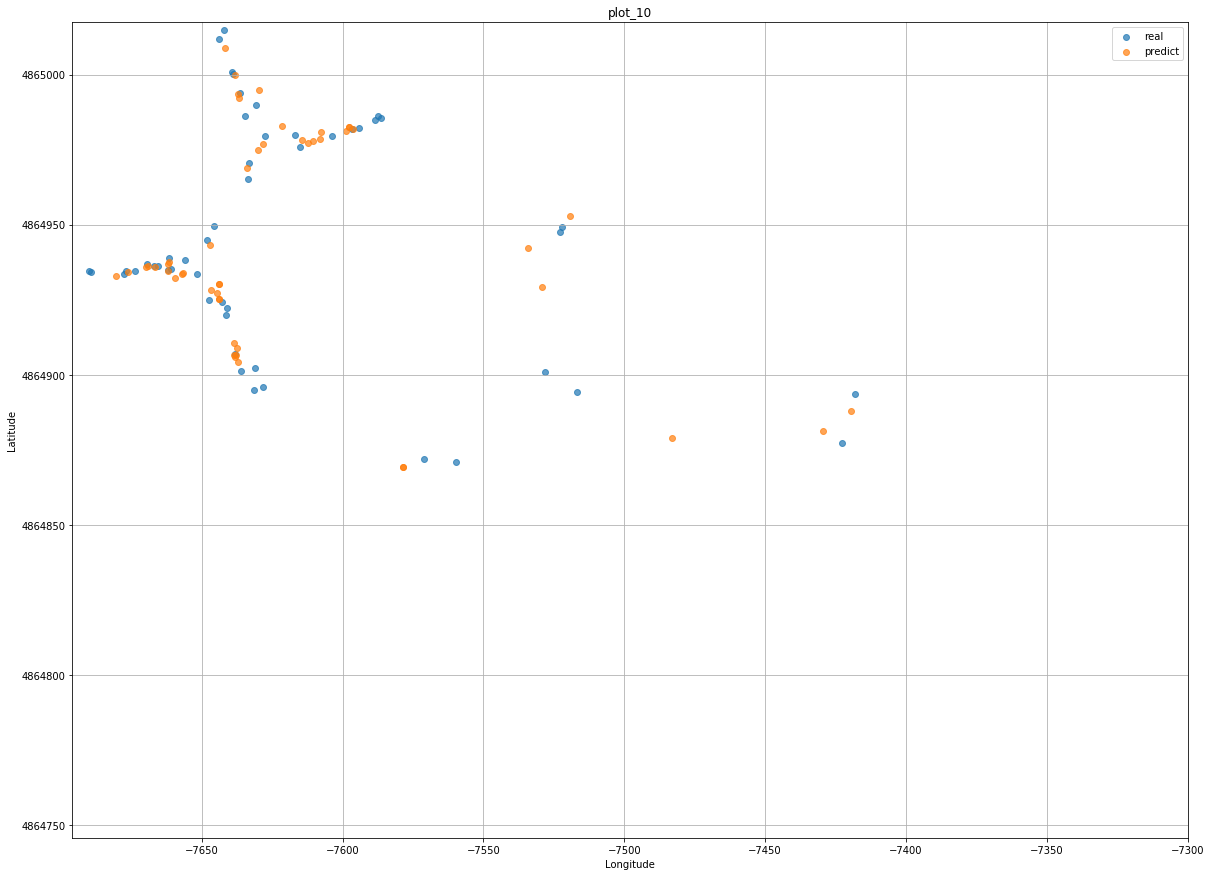

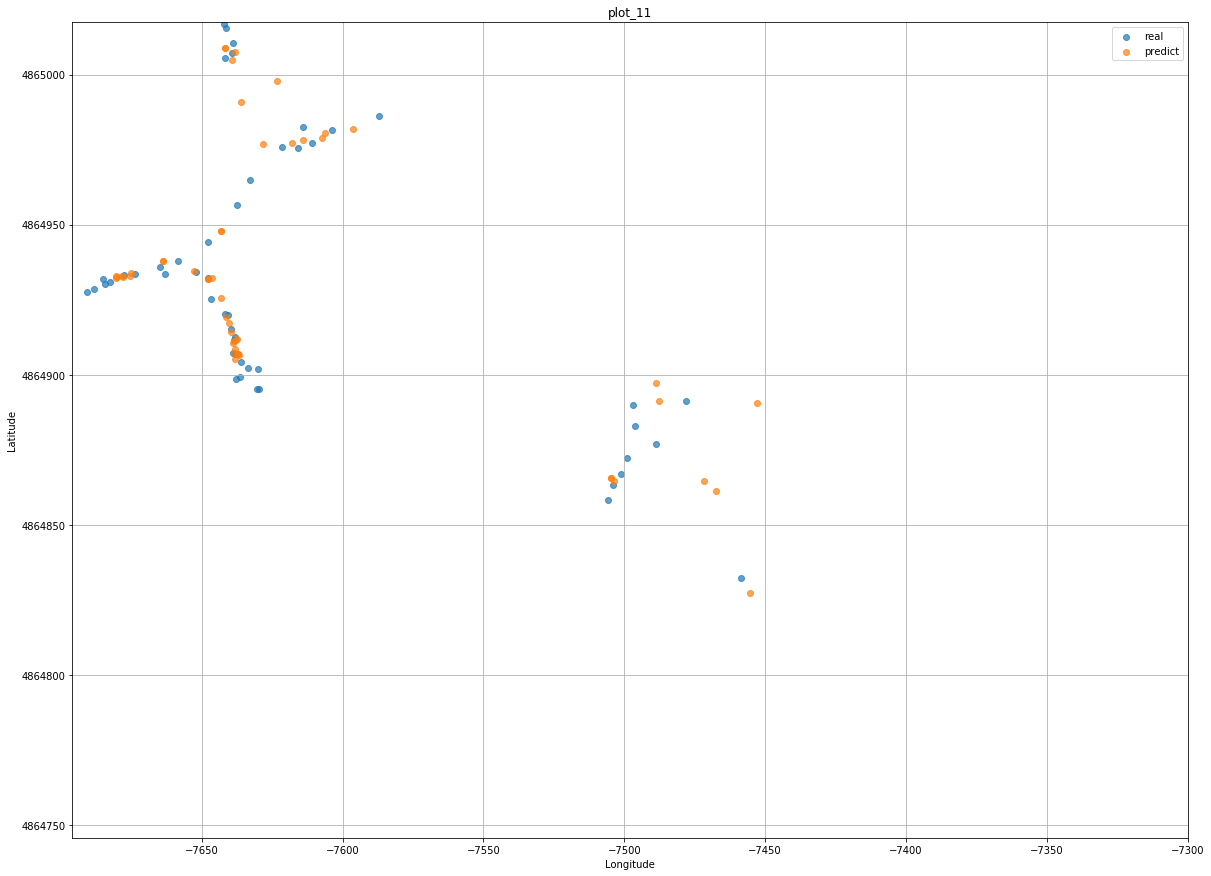

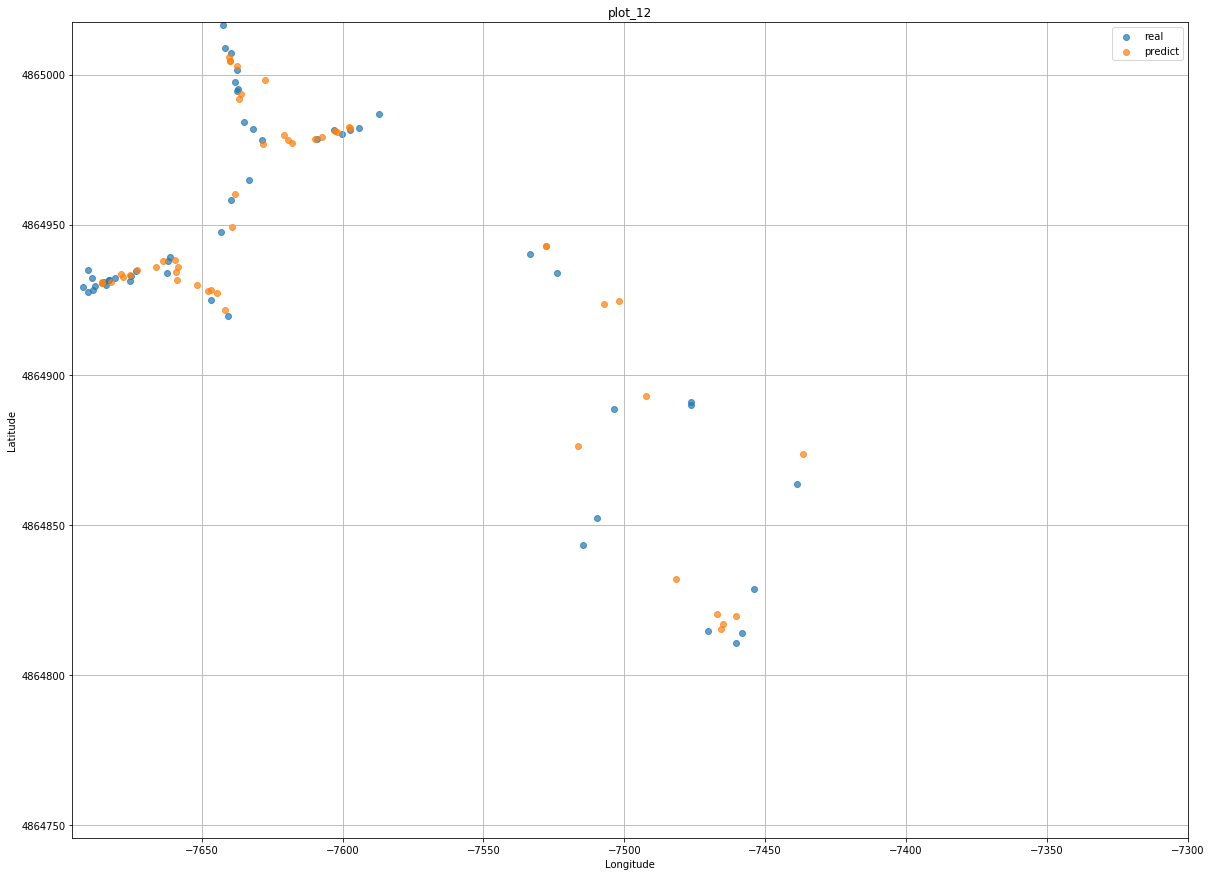

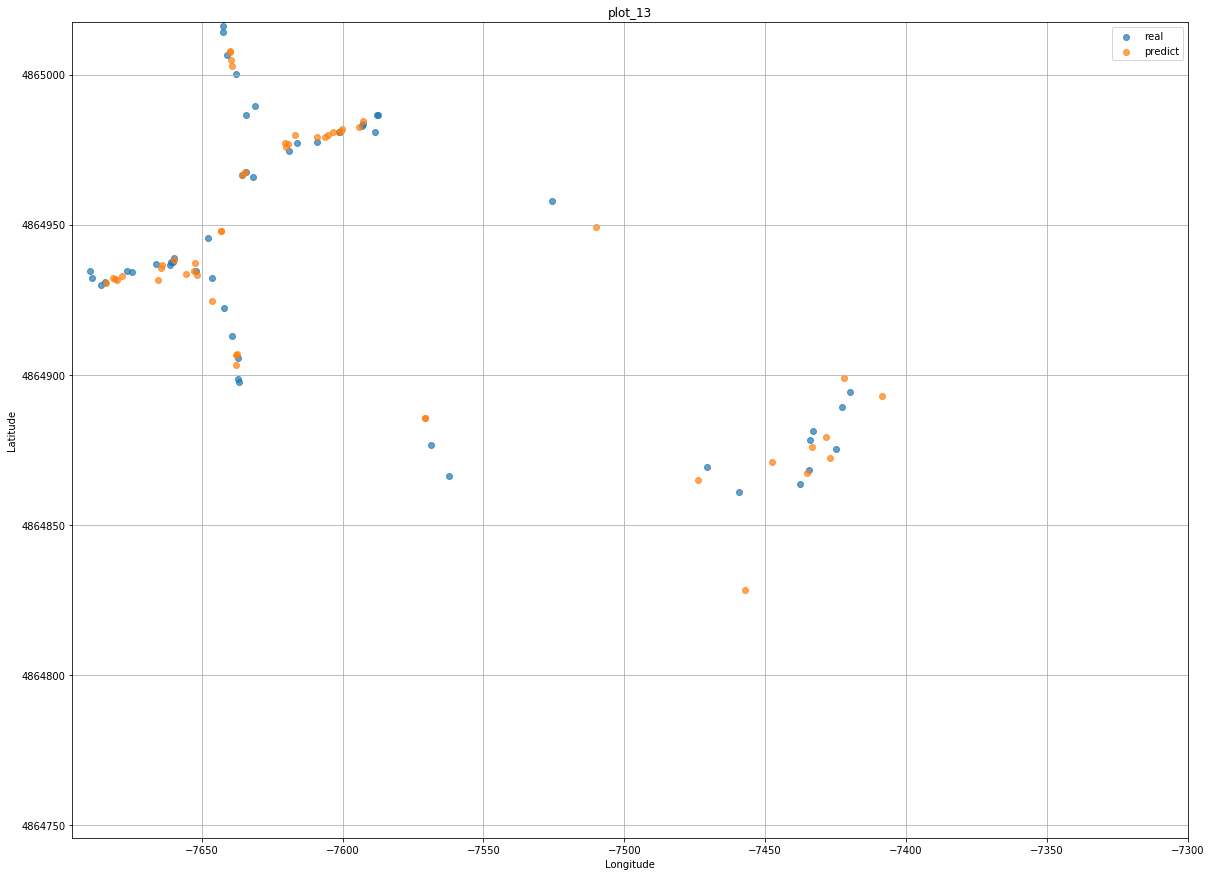

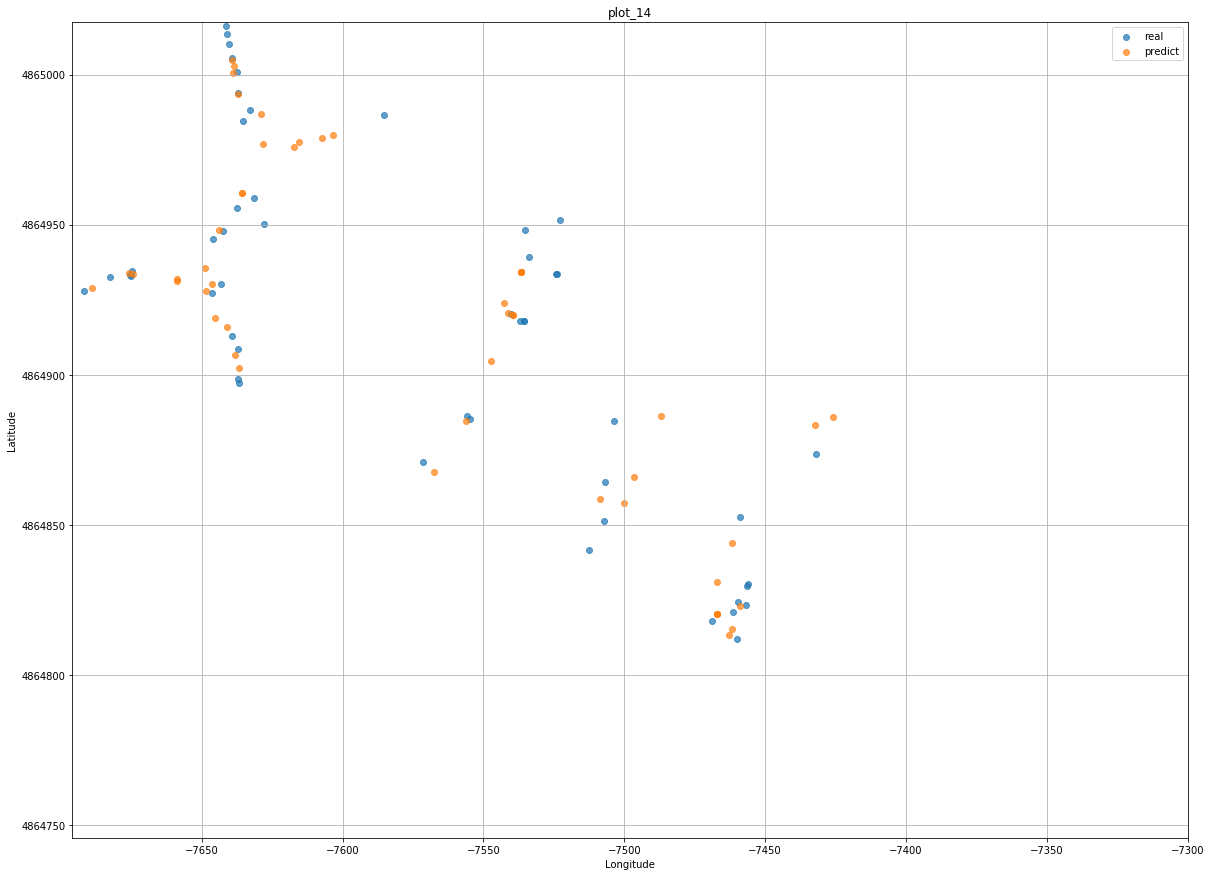

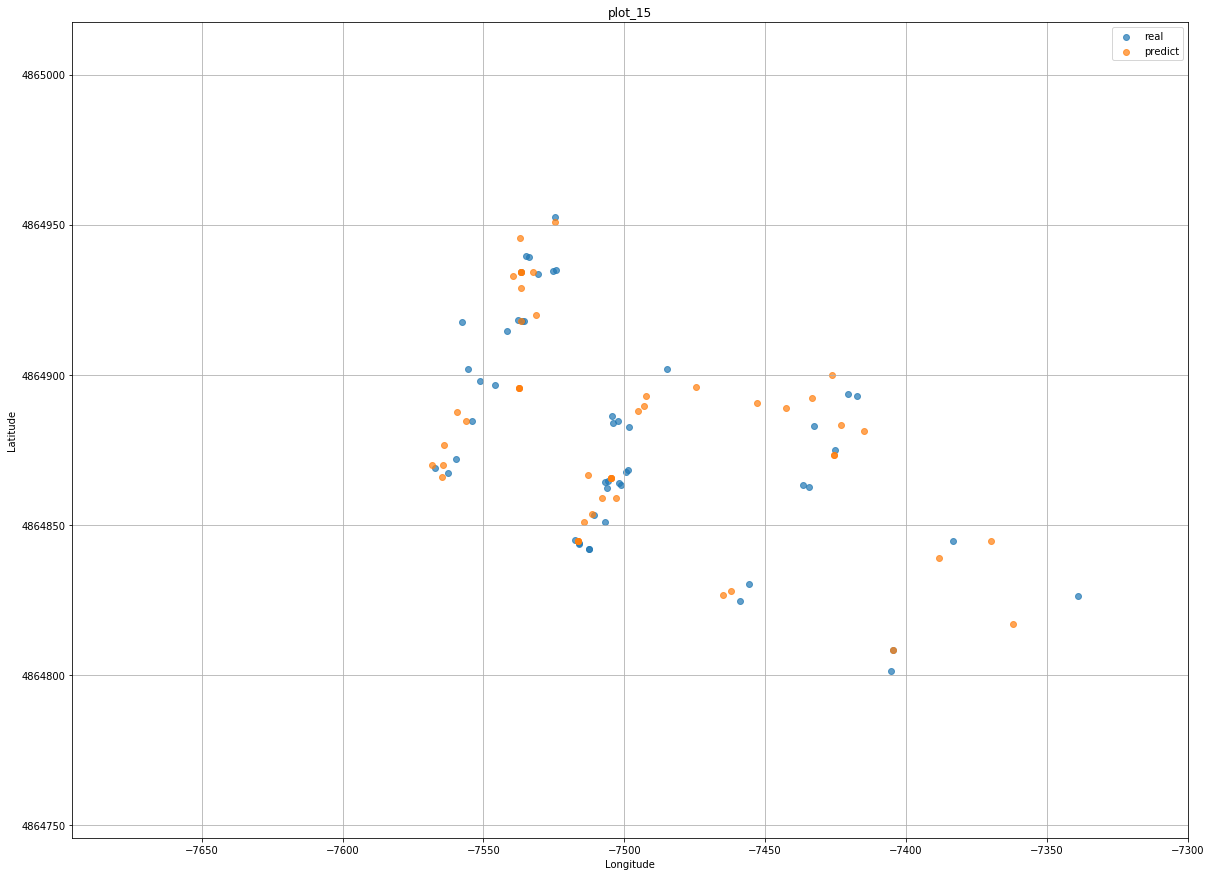

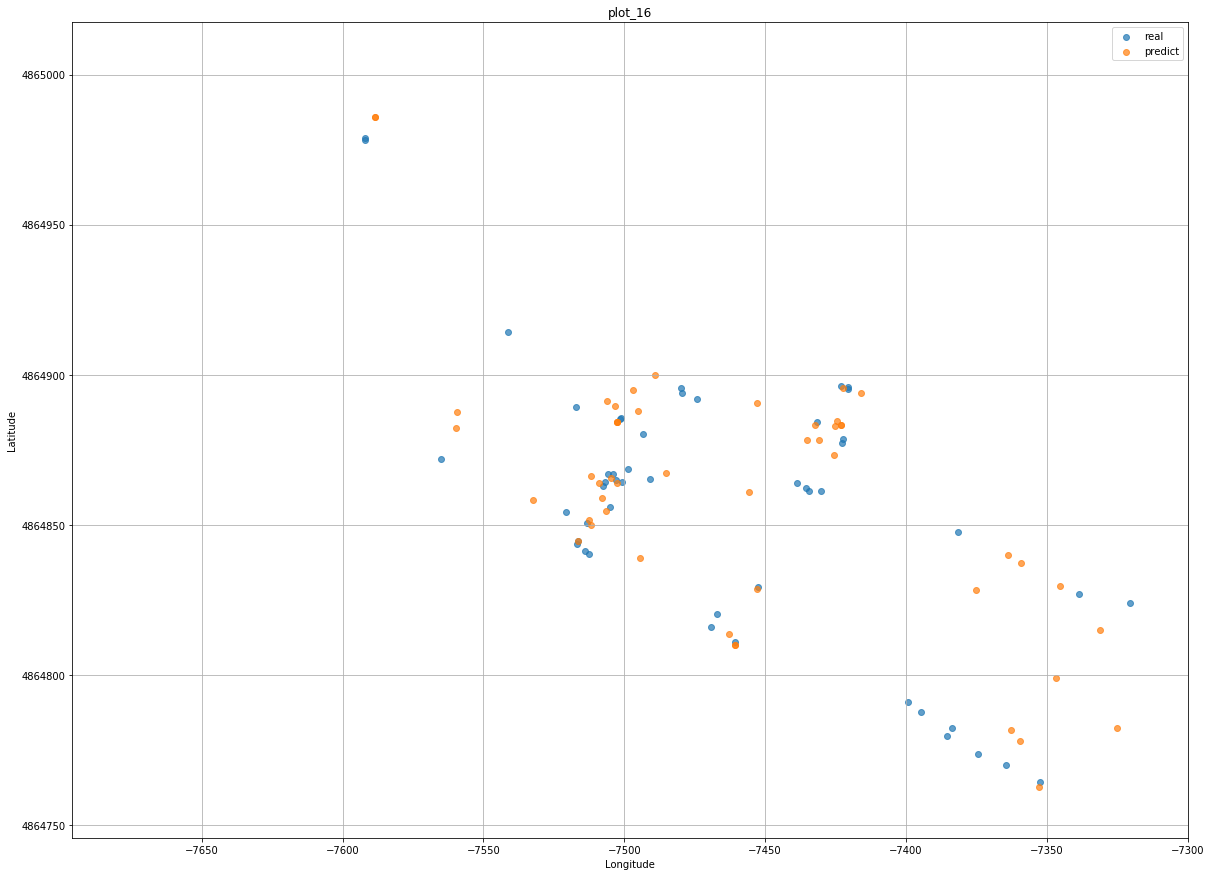

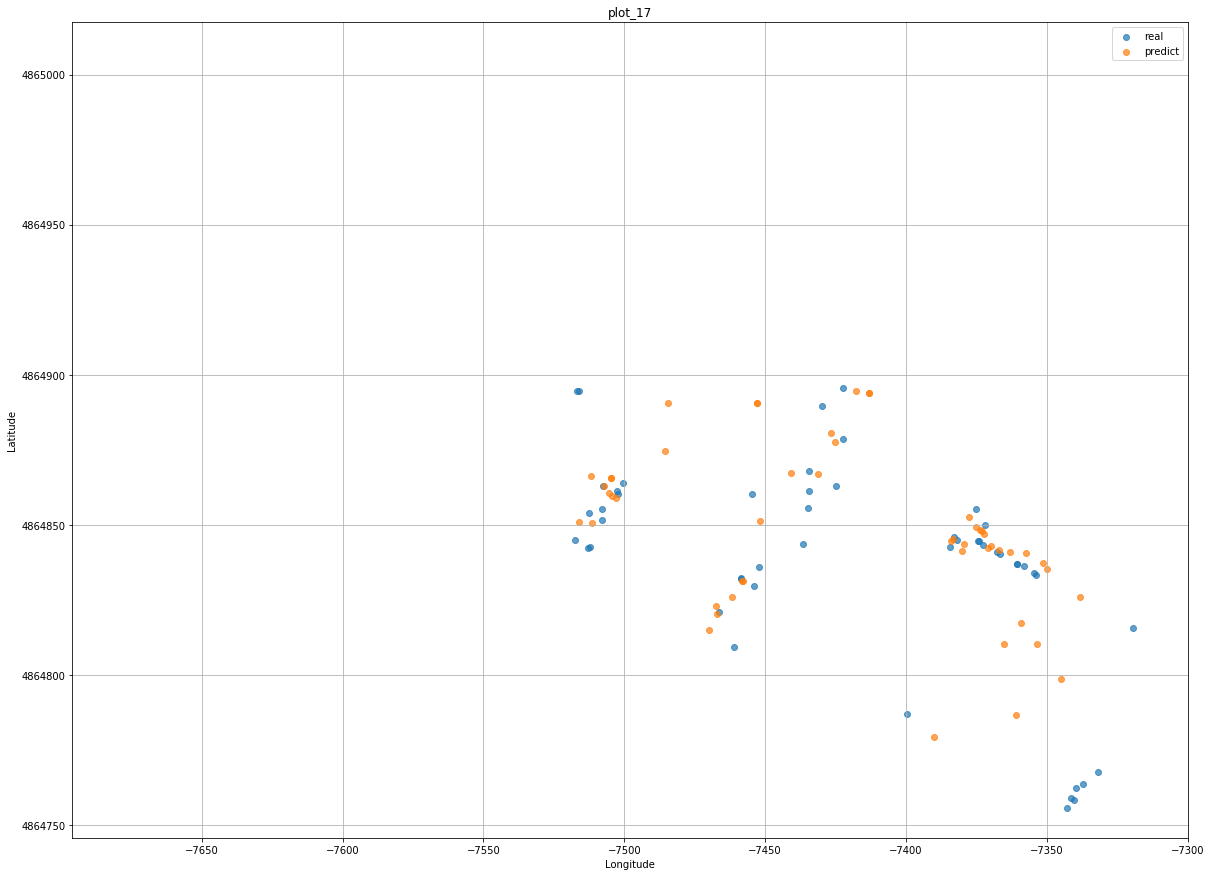

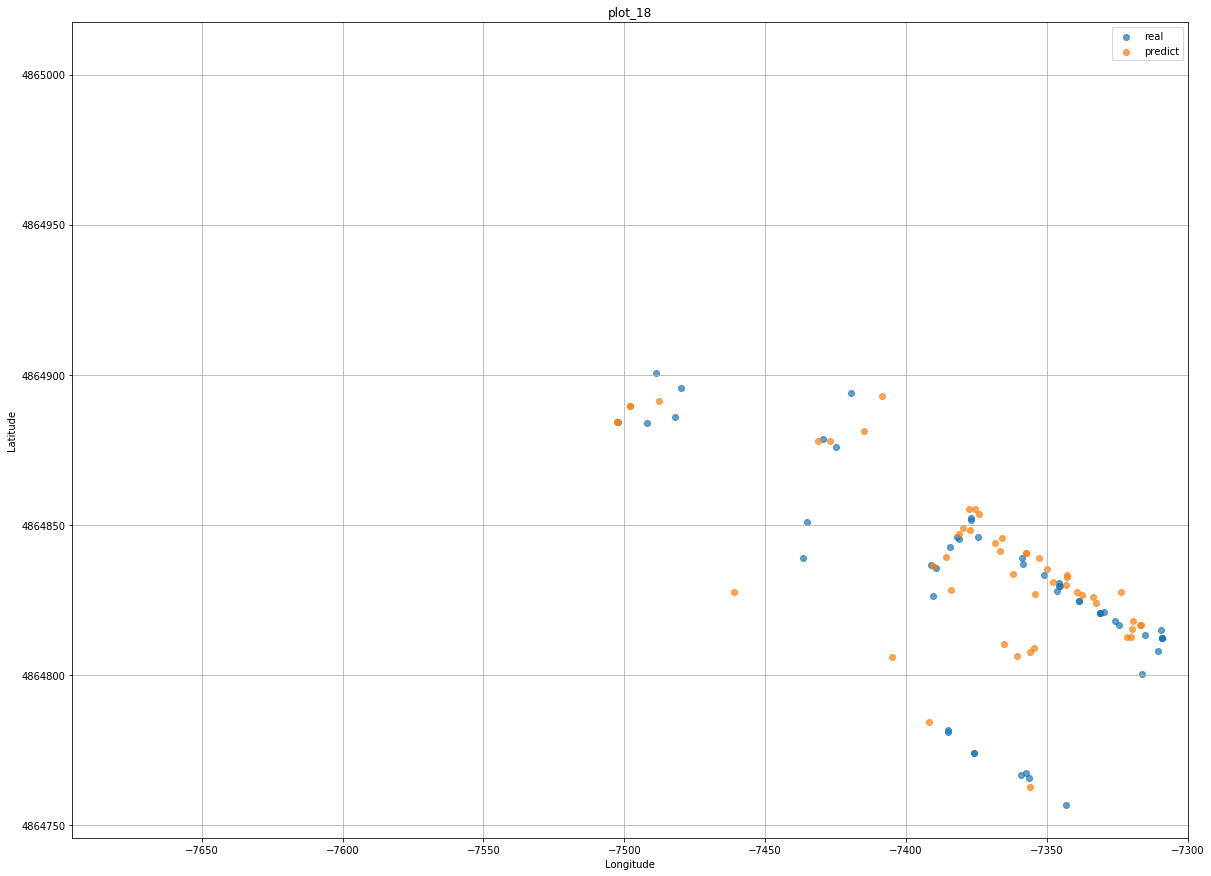

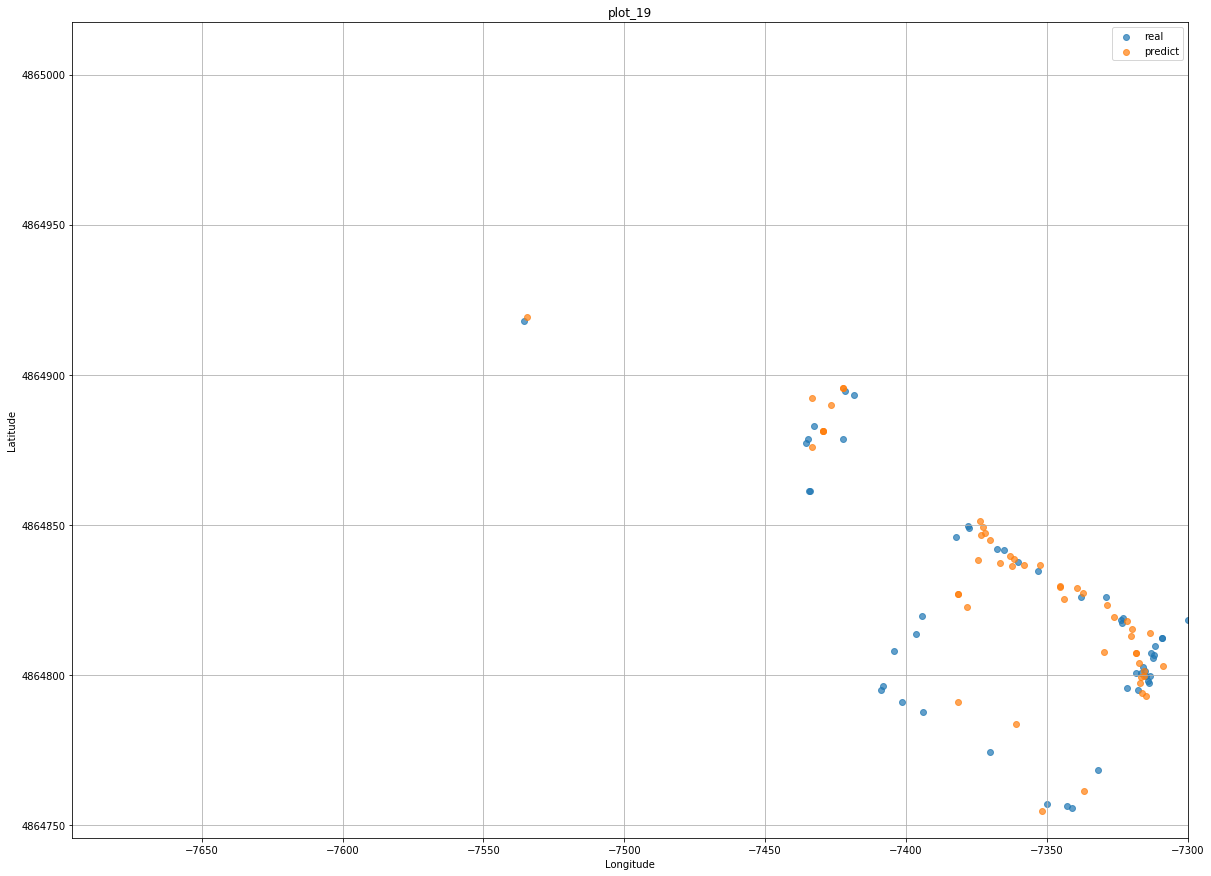

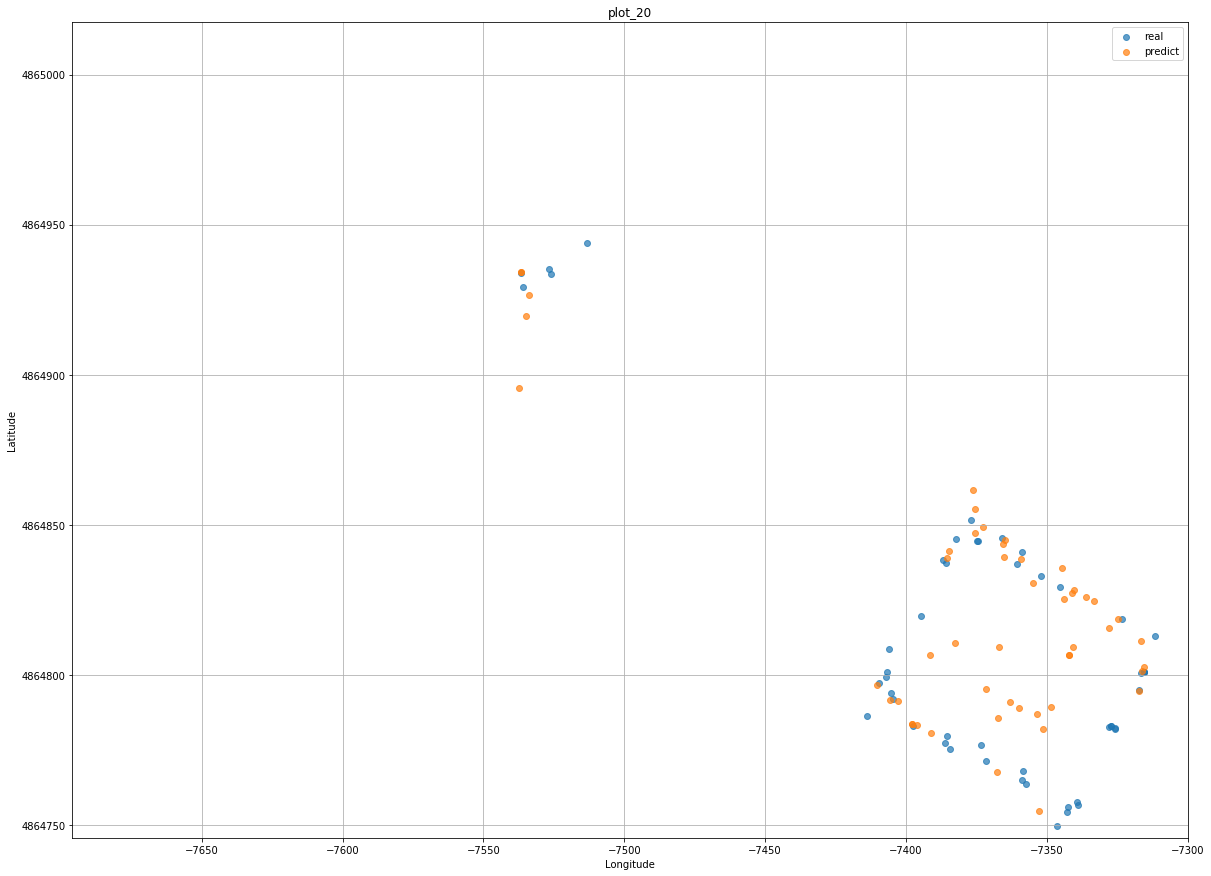

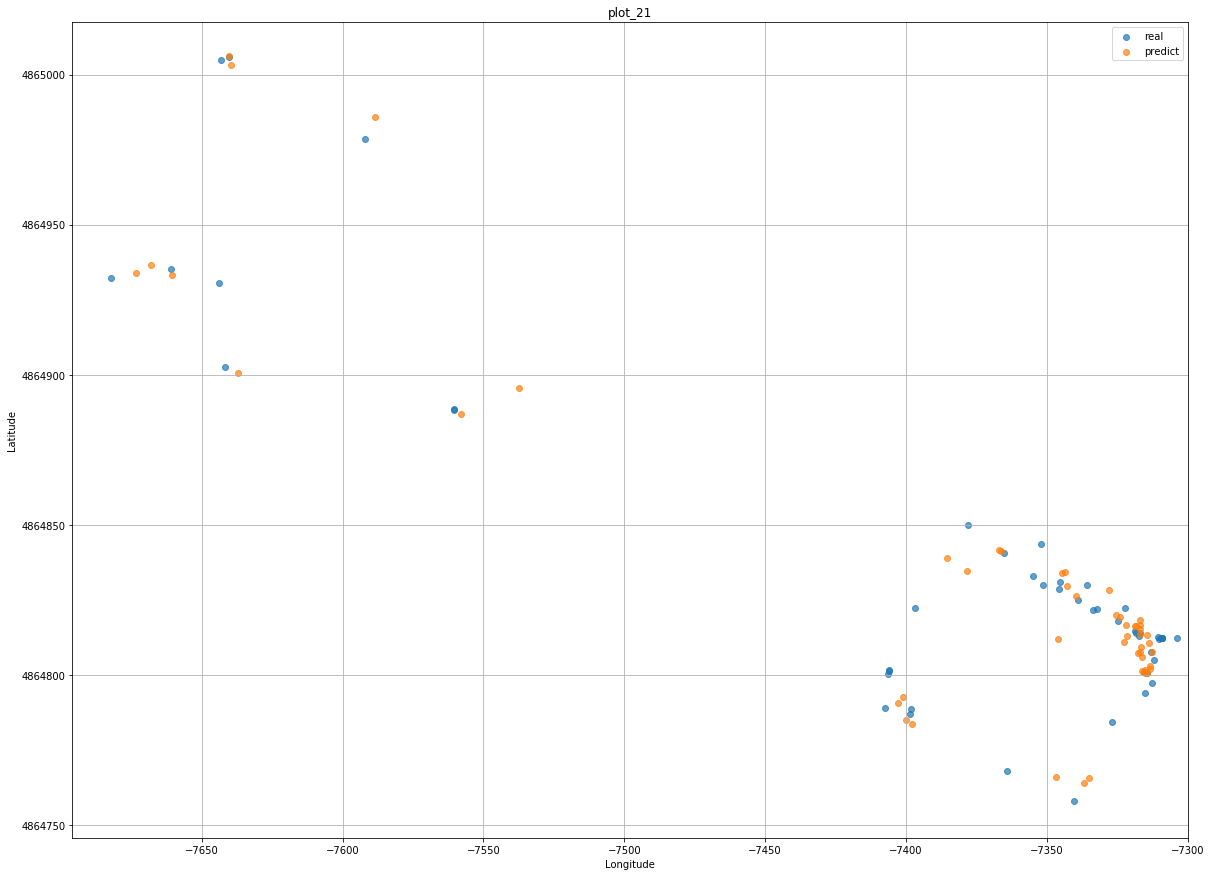

In [18]:
for i in range(1,len(raw_validation)//50):
    plt.figure(figsize=(20, 15))
    plt.scatter(raw_validation["LONGITUDE"][i*50-50:i*50], raw_validation["LATITUDE"][i*50-50:i*50], label = "real", alpha=0.7)
    plt.scatter(pd.DataFrame(predic_y)[0][i*50-50:i*50], pd.DataFrame(predic_y)[1][i*50-50:i*50], label = "predict", alpha=0.7)
    plt.legend()
    plt.grid()
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("observation points")
    plt.ticklabel_format(style = "plain")
    plt.ylim(4864745.7450159714 ,4865017.3646842018)
    plt.xlim(-7695.9387549299299000, -7299.786516730871000 )
    plt.title("plot_{:02}" .format(i))
    plt.show()

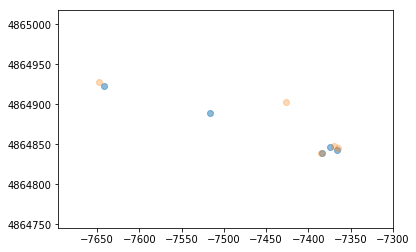

In [31]:
plt.scatter(raw_validation.iloc[:5, 520], raw_validation.iloc[:5, 521], label = "real", alpha=0.5)
plt.scatter(pd.DataFrame(predic_y).iloc[:5, 0], pd.DataFrame(predic_y).iloc[:5, 1], label = "predict", alpha=0.3)
plt.ylim(4864745.7450159714 ,4865017.3646842018)
plt.xlim(-7695.9387549299299000, -7299.786516730871000 )
plt.show()

### 딥러닝-1

In [10]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import *
from keras.wrappers.scikit_learn import KerasRegressor
import keras

Using TensorFlow backend.


In [47]:
model = Sequential()

In [328]:
model.add(Dense(100, input_dim=544, activation="relu", kernel_initializer="uniform"))
model.add(Dense(120, activation="relu", kernel_initializer="glorot_uniform"))
model.add(Dense(80, activation="relu", kernel_initializer="glorot_uniform"))
model.add(Dense(2, activation="relu", kernel_initializer="glorot_uniform"))
model.compile(optimizer=RMSprop(), loss='mean_squared_error', metrics=["accuracy"])

In [329]:
model.layers

In [330]:
model_result = model.fit(train_x.values, train_y.values, epochs=10, batch_size=100, 
                         validation_data=(validation_x.values, validation_y.values), verbose=2)

Train on 19937 samples, validate on 1111 samples
Epoch 1/10
1s - loss: 11798396512128.9316 - acc: 0.9995 - val_loss: 11696012416793.5762 - val_acc: 1.0000
Epoch 2/10
0s - loss: 11279827378101.6289 - acc: 1.0000 - val_loss: 10617178948409.8359 - val_acc: 1.0000
Epoch 3/10
0s - loss: 9205230492583.7090 - acc: 1.0000 - val_loss: 7433602107851.0029 - val_acc: 1.0000
Epoch 4/10
0s - loss: 4852435814710.5332 - acc: 1.0000 - val_loss: 2314360689941.4292 - val_acc: 1.0000
Epoch 5/10
0s - loss: 607790436960.8940 - acc: 1.0000 - val_loss: 13609253768.1800 - val_acc: 1.0000
Epoch 6/10
0s - loss: 3518932196.1876 - acc: 1.0000 - val_loss: 13443931674.0378 - val_acc: 1.0000
Epoch 7/10
0s - loss: 2501424059.6246 - acc: 1.0000 - val_loss: 14422243943.2295 - val_acc: 1.0000
Epoch 8/10
0s - loss: 1994555318.0133 - acc: 1.0000 - val_loss: 13200646303.4527 - val_acc: 1.0000
Epoch 9/10
0s - loss: 1690943504.6605 - acc: 1.0000 - val_loss: 15732189081.2313 - val_acc: 1.0000
Epoch 10/10
0s - loss: 1499814697.

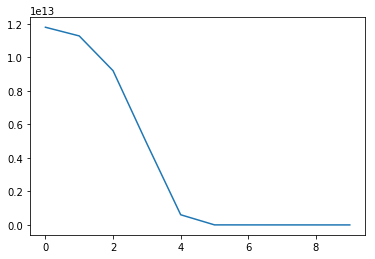

In [331]:
plt.plot(model_result.history["loss"])
plt.show()

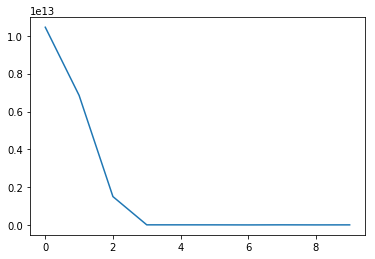

In [313]:
plt.plot(model_result.history["val_loss"])
plt.show()

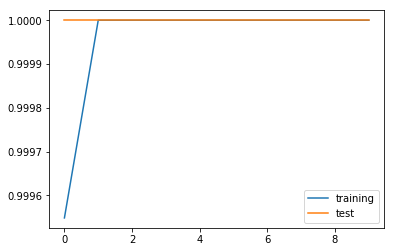

In [332]:
plt.plot(model_result.history["acc"], label="training")
plt.plot(model_result.history["val_acc"], label="test")
plt.legend()
plt.show()

In [333]:
y_predict = model.predict_classes(validation_x.values)

  32/1111 [..............................] - ETA: 6s

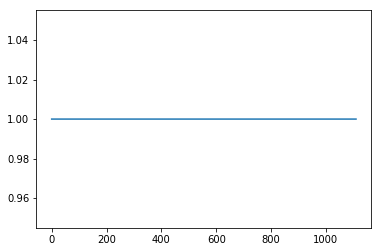

In [334]:
plt.plot(y_predict)
plt.show()

In [335]:
y_predict

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [30]:
train_y

,LONGITUDE,LATITUDE
0,-7541.264300,4.864921e+06
1,-7536.621200,4.864934e+06
2,-7519.152400,4.864950e+06
3,-7524.570400,4.864934e+06
4,-7632.143600,4.864982e+06
5,-7533.896200,4.864939e+06
6,-7519.152400,4.864950e+06
7,-7527.451100,4.864929e+06
8,-7559.497300,4.864888e+06
9,-7510.437173,4.864949e+06


### 딥러닝-2

In [30]:
def baseline_model():
    # create model
    model_t = Sequential()
    model_t.add(Dense(10, input_dim=520, kernel_initializer='glorot_uniform', activation='relu'))
    model_t.add(Dense(5, kernel_initializer='glorot_uniform', activation='relu'))
    model_t.add(Dense(1, kernel_initializer='glorot_uniform'))
    # Compile model
    model_t.compile(loss='mean_absolute_error', optimizer=RMSprop())
    return model_t

In [31]:
kerasR = keras.wrappers.scikit_learn.KerasRegressor(build_fn=baseline_model, epochs=200, batch_size=1, verbose=2)

In [32]:
aa = kerasR.fit(x= train_x.iloc[:, :520].values, y =train_y.iloc[:, 0].values)

Epoch 1/200
13s - loss: 2288.0486
Epoch 2/200
13s - loss: 646.1643
Epoch 3/200
13s - loss: 256.6997
Epoch 4/200
16s - loss: 43.8465
Epoch 5/200
15s - loss: 30.6369
Epoch 6/200
13s - loss: 30.1289
Epoch 7/200
13s - loss: 30.2230
Epoch 8/200
14s - loss: 30.1684
Epoch 9/200
15s - loss: 30.1986
Epoch 10/200
13s - loss: 30.0619
Epoch 11/200
14s - loss: 30.0502
Epoch 12/200
14s - loss: 30.0315
Epoch 13/200
13s - loss: 29.9823
Epoch 14/200
14s - loss: 29.9392
Epoch 15/200
13s - loss: 29.9682
Epoch 16/200
15s - loss: 30.0175
Epoch 17/200
15s - loss: 29.9228
Epoch 18/200
15s - loss: 29.9744
Epoch 19/200
14s - loss: 29.8682
Epoch 20/200
14s - loss: 29.9076
Epoch 21/200
14s - loss: 29.7079
Epoch 22/200
14s - loss: 29.8879
Epoch 23/200
15s - loss: 29.8775
Epoch 24/200
15s - loss: 29.8385
Epoch 25/200
13s - loss: 29.5920
Epoch 26/200
14s - loss: 29.7237
Epoch 27/200
15s - loss: 29.6841
Epoch 28/200
14s - loss: 29.7267
Epoch 29/200
18s - loss: 29.7665
Epoch 30/200
15s - loss: 29.6301
Epoch 31/200
17

In [33]:
y_predict_reg = aa.model.predict(validation_x.iloc[:, :520].values)

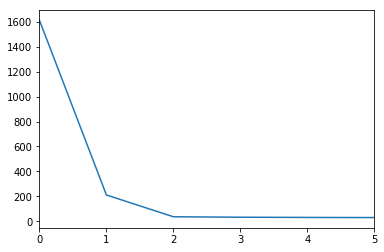

In [27]:
plt.plot(aa.history["loss"])
plt.xlim(0, 5)
#plt.ylim(0, 1)
plt.show()

In [28]:
y_predict_reg[:, 0]

array([-7547.15478516, -7322.72412109, -7374.91699219, ..., -7587.41357422,
       -7632.89892578, -7624.40136719], dtype=float32)

In [17]:
pd.DataFrame(y_predict_reg)

,0
0,-7569.803711
1,-7336.377441
2,-7371.149414
3,-7362.041504
4,-7615.928223
5,-7300.870117
6,-7345.888184
7,-7325.866699
8,-7358.454102
9,-7332.787109


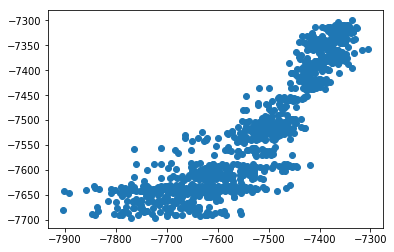

In [34]:
plt.scatter(y_predict_reg[:, 0], validation_y.iloc[:, 0])
plt.show()

In [94]:
y_predict_reg[:, 0]

array([-8381.1484375 , -8381.73828125, -8380.60546875, ..., -8377.00976562,
       -8374.75390625, -8378.44335938], dtype=float32)

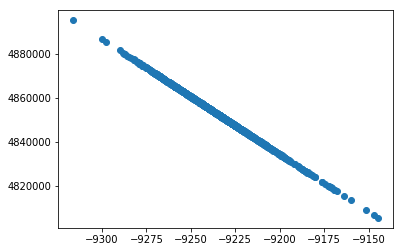

In [106]:
plt.scatter(pd.DataFrame(y_predict_reg).iloc[:, 0], pd.DataFrame(y_predict_reg).iloc[:, 1])
plt.show()

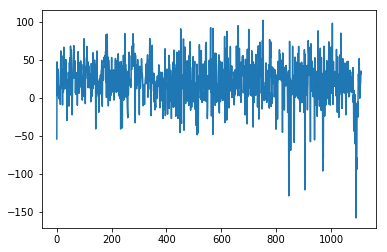

In [18]:
plt.plot(pd.DataFrame(y_predict_reg).iloc[:, 0]-validation_y.iloc[:, 0])
plt.show()

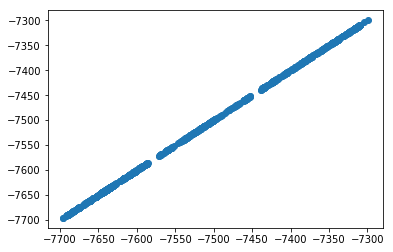

In [58]:
plt.scatter(validation_y.iloc[:, 0], validation_y.iloc[:, 0])
plt.show()

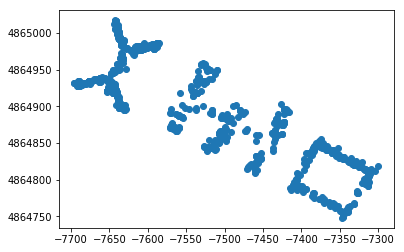

In [57]:
plt.scatter(validation_y.iloc[:, 0], validation_y.iloc[:, 1])
plt.show()

### 빌딩 번호 찾기

In [15]:
nor_train.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.933333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
nor_validation.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
from sklearn import tree

In [18]:
Decision_class = tree.DecisionTreeClassifier()

In [24]:
clf = Decision_class.fit(nor_train, raw_train["BUILDINGID"])

In [26]:
predict_building = clf.predict(nor_validation)

In [35]:
len(raw_validation[raw_validation["BUILDINGID"]-predict_building != 0])

21

In [36]:
len(raw_validation[raw_validation["BUILDINGID"]-predict_building == 0])

1090

In [37]:
len(predict_building)

1111